# Predicting Activity Type from Strava Activities History





Motivation:

Based on past sport activities and health data, predict the next activity.  


Idea:

The user will learn in an interactive way the predicted for the day. The application will stores on a  daily  basis the user location using GPS. The predicted future activity will be visualized in a nightstand lamp printed in 3D.

Advantages:

The user will know what sport activity he needs the next day. This helps the user stay in shape





Strava is the most popular social network app for people who cycle or do triathon or running or any or 
With this social media you can track your activities in Running, Cycling, Swimming , walking and even people record gym workout.

The data will be rertreived form the application. 

 I will analyse my strava feed from the last 3 years and build a regression mode to predict the next activity based on the statistics recorded.



# Machine Learning Workflow

Although the exact implementation details can vary, the general structure of a machine learning project stays relatively constant:

- Load Data
- Data cleaning and formatting
- Exploratory data analysis 
- Feature engineering and selection
- Establish a baseline and compare several machine learning models on a performance metric
- Perform hyperparameter tuning on the best model to optimize it for the problem
- Evaluate the best model on the testing set
- Interpret the model results to the extent possible
- Draw conclusions 



# Load Data



In [1]:
# import packages to use in the notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
from datetime import datetime
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [2]:
data = pd.read_csv('./strava_data.csv')


In [3]:
data.head(50)

Unnamed: 0         id                           external_id    upload_id  \
0            0  282363847  9A54FEB2-B831-404F-911C-AC747346D5CB  319052304.0   
1            1  289575461  4CDDC3BE-7EEB-4E42-A267-83CCF01030DF  327365800.0   
2            2  290085349  5FA2E7AC-6255-4598-AC63-CEFF43CB9B2D  327965312.0   
3            3  290188116  E070401A-54B9-40FD-BF9E-068E7C5252E5  328079415.0   
4            4  290272559  4F35938D-5C57-4E13-9D05-137946A8AA5B  328186607.0   
5            5  290724707  F3B599AA-8F75-45FF-9A5A-21FD6645996B  328705623.0   
6            6  290880661  2CB21F31-9357-4D0D-AF17-39C2B10C468E  328892041.0   
7            7  291998887  5984DB91-E26F-4F7A-9DAF-001A1DEEAF17  330187341.0   
8            8  293353854  BB721D65-1B68-4F83-AB7A-6302C906EE54  331774288.0   
9            9  293829840  CC49F82D-43F2-4EC9-A978-3FEF15D2D32C  332329323.0   
10          10  294012063  43FA84AB-0855-49B7-A77A-4C576A2F27CB  332543032.0   
11          11  294433808  324AF21B-481B-442B-AD52-B7300765807B  333025852.0   
12          12  294570073  88A4EDFB-2892-4979-9F88-2EBDA101757A  333179480.0   
13          13  294631897  3211453C-6C77-4AFC-B224-6847B1A25BCF  333259398.0   
14          14  294662785  C15CCC15-B5E7-4EEC-B478-D51C64B03960  333293386.0   
15          15  295063859  BBB26CF1-4C3F-4270-9A46-E7A394B16801  333753652.0   
16          16  295114363  B7A9E610-8E87-416F-9E24-14F6C153A4B2  333809357.0   
17          17  295257717  86395438-7C4B-44B3-99A8-5AF2617EF6EC  333979045.0   
18          18  295741831  38E1F7B1-CC72-4CA8-96E4-AA463C720FCF  334538485.0   
19          19  297649283  6DAABDB2-F75F-47E9-8272-9AE926991988  336784396.0   
20          20  297653159  715D4AA0-C295-4BFA-85A7-F9A2FE009CC9  336788900.0   
21          21  297743731  396D1AC0-50E2-4A1B-B2D5-8AA47A018C6E  336895103.0   
22          22  297808731  F191481B-A851-498C-96CA-C488BB28C0AD  336978220.0   
23          23  298855375  71258A08-1678-400A-BF3E-BE2E5281C17C  338178201.0   
24          24  299097034  68133CEC-5DCF-4920-A7EF-83FD3E9D67B5  338451326.0   
25          25  302187114  5989FC35-095C-4EAD-9389-1103A334E6E8  341960345.0   
26          26  302693757  AA9448C2-A238-4A8B-9BD4-4DDB95F9C147  342529472.0   
27          27  302791824  7C5C44B1-20E9-4686-A40B-81E0043BB702  342636964.0   
28          28  302876126  2C1DCDC0-D825-4B14-B41A-39B375E1295E  342730264.0   
29          29  303339557  5F7E41E3-93CD-4D33-90F7-AB63F95314BB  343246978.0   
30          30  303461321  21FDFF04-FBB4-4D03-8654-D7F031CE1494  343381593.0   
31          31  303548108  6DFF8E6D-AAF8-44E3-B3CF-A632A75DE6A2  343478294.0   
32          32  304021932  8A718B23-DA4A-4F20-BDFD-1EDA7F5B552A  344008974.0   
33          33  304209670  3AC9F967-B299-427D-89C5-4FD63D42C046  344220573.0   
34          34  304781293  147FA6A6-963F-4125-AF7A-45BBD7507BA7  344866690.0   
35          35  353305928  0EA7C51A-5036-4F0B-8767-E246C284D724  400061982.0   
36          36  355481261  26258773-8AAC-4C1E-9B28-73052CF26630  402334302.0   
37          37  355696410  B8BDB747-DA6F-4527-A73A-A256D58CB1E3  402557559.0   
38          38  355713701  E9689DF9-DDFA-4109-991D-2BA4ED033C77  402575320.0   
39          39  356920620  F91F7E47-8D5C-4551-B33F-C1ABD9E449C1  403830957.0   
40          40  357135666  DA06C4EB-C134-4B94-B2A2-2838E70FFD3D  404054440.0   
41          41  361383930  453D3F84-E283-4100-A41C-F2DA97C9DB14  408583865.0   
42          42  361605639  194832D4-077A-46F9-962E-C3DF1514EA27  408812847.0   
43          43  366883955  F33EEF22-AD2C-4CEC-AA5D-D11F03D4B4CC  414593989.0   
44          44  367098391  F7CE2B98-785A-4326-BCFC-CDA8E00C6ADB  414817865.0   
45          45  368410761  466835B5-3F06-46D8-9461-FE0C3A33126F  416189347.0   
46          46  368715856  235641F6-D9E6-47D9-B6C4-4C4A9BCFB480  416503777.0   
47          47  370718809  4FF567C8-7128-4780-AB1A-0115C937A9FE  418607852.0   
48          48  370896696  7BB62CA3-0D37-44ED-9A9B-76153260A338  418793279.0   
49  

In [4]:
#check columns names
data.columns

Index(['Unnamed: 0', 'id', 'external_id', 'upload_id', 'athlete', 'name',
       'distance', 'moving_time', 'elapsed_time', 'total_elevation_gain',
       'elev_high', 'elev_low', 'type', 'start_date', 'start_date_local',
       'timezone', 'start_latlng', 'end_latlng', 'achievement_count',
       'kudos_count', 'comment_count', 'athlete_count', 'photo_count',
       'total_photo_count', 'map', 'trainer', 'commute', 'manual', 'private',
       'flagged', 'workout_type', 'average_speed', 'max_speed', 'has_kudoed',
       'gear_id', 'kilojoules', 'average_watts', 'device_watts', 'max_watts',
       'weighted_average_watts'],
      dtype='object')

In [5]:
for i in range(len(data)):
    if data['type'][i]=='Ride' and data['average_speed'][i]<5:
        data['type'][i]='Walk'

    if data['type'][i]=='VirtualRide' and data['elapsed_time'][i]>1000 and data['max_speed'][i]<9 :
        data['type'][i]='Walk'
    if data['distance'][i]>1000 and data['max_speed'][i]<6 :
        data['type'][i]='Walk'
        
    if data['type'][i]=='Swim' :
        data['type'][i]='Walk'
        

C:\Users\Salma Kastalli\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Salma Kastalli\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
for i in range(len(data)):
    if data['name'][i]=='Afternoon Ride' and data['max_speed'][i]>9:
        data['type'][i]='VirtualRide'
    if data['name'][i]=='Morning Ride' and data['average_speed'][i]>9:
        data['type'][i]='VirtualRide'
        

C:\Users\Salma Kastalli\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
for i in range(len(data)):
    if data['type'][i]=='Ride' and data['distance'][i]>4000 and data['max_speed'][i]<11:
        data['type'][i]='Run'
        

C:\Users\Salma Kastalli\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


# Data cleaning and formatting 

The goal in this step is to make sure the data is machine learning ready, there is no nulls, the features are in the right numeric format for analysis and modelling

In [8]:
data['type'].unique()

array(['VirtualRide', 'Ride', 'Run', 'Walk'], dtype=object)

In [9]:
data.groupby(['type']).count()

Unnamed: 0   id  external_id  upload_id  athlete  name  distance  \
type                                                                            
Ride                430  430          430        430      430   430       430   
Run                 263  263          263        263      263   263       263   
VirtualRide         309  309          309        309      309   309       309   
Walk                 89   89           88         88       89    89        89   

             moving_time  elapsed_time  total_elevation_gain  ...  \
type                                                          ...   
Ride                 430           430                   430  ...   
Run                  263           263                   263  ...   
VirtualRide          309           309                   309  ...   
Walk                  89            89                    89  ...   

             workout_type  average_speed  max_speed  has_kudoed  gear_id  \
type                                                                       
Ride                  344            430        430         430      312   
Run                    67            263        263         263      202   
VirtualRide           136            309        309         309      178   
Walk                   57             89         89          89       55   

             kilojoules  average_watts  device_watts  max_watts  \
type                                                              
Ride                429            429           430          0   
Run                 256            256           256          0   
VirtualRide         307            307           309          1   
Walk                 42             42            42          0   

             weighted_average_watts  
type                                 
Ride                              0  
Run                               0  
VirtualRide                       1  
Walk                              0  

[4 rows x 39 columns]

In [10]:
data.describe()

Unnamed: 0            id     upload_id       distance   moving_time  \
count  1091.000000  1.091000e+03  1.090000e+03    1091.000000   1091.000000   
mean    545.000000  1.368174e+09  1.475200e+09   17832.404950   3172.658112   
std     315.088876  6.132494e+08  6.452594e+08   19036.226088   3373.158697   
min       0.000000  2.823638e+08  3.190523e+08       0.000000      0.000000   
25%     272.500000  9.005822e+08  9.993929e+08    9244.450000   1538.000000   
50%     545.000000  1.342643e+09  1.450333e+09   10035.100000   1729.000000   
75%     817.500000  1.882882e+09  2.016739e+09   13039.800000   3180.500000   
max    1090.000000  2.533487e+09  2.689640e+09  176743.000000  29307.000000   

       elapsed_time  total_elevation_gain    elev_high     elev_low  \
count   1091.000000           1091.000000  1083.000000  1083.000000   
mean    4751.109991            202.543171   192.231671    36.132687   
std     7012.229122            371.659152   259.846491    57.765964   
min        0.000000              0.000000  -500.000000  -500.000000   
25%     1762.500000             28.000000    56.000000    18.650000   
50%     1986.000000             43.100000    73.000000    30.300000   
75%     5123.500000             97.500000   248.400000    41.200000   
max    46574.000000           3593.000000  2583.800000   418.700000   

       achievement_count  ...  athlete_count  photo_count  total_photo_count  \
count        1091.000000  ...    1091.000000       1091.0        1091.000000   
mean            6.223648  ...       1.349221          0.0           0.412466   
std            14.941274  ...       1.197071          0.0           1.135091   
min             0.000000  ...       1.000000          0.0           0.000000   
25%             0.000000  ...       1.000000          0.0           0.000000   
50%             1.000000  ...       1.000000          0.0           0.000000   
75%             4.000000  ...       1.000000          0.0           0.000000   
max           134.000000  ...      23.000000          0.0           7.000000   

       workout_type  average_speed    max_speed   kilojoules  average_watts  \
count    604.000000    1091.000000  1091.000000  1034.000000    1034.000000   
mean       8.102649       5.686684    12.168286   352.312766     100.776983   
std        3.934294       1.052841     3.490396   435.395440      23.236931   
min        0.000000       0.000000     0.000000     0.000000       0.000000   
25%       10.000000       5.462000    10.200000   135.225000      83.025000   
50%       10.000000       5.853000    11.400000   168.450000     101.400000   
75%       10.000000       6.210000    14.600000   283.900000     118.200000   
max       12.000000       9.475000    36.200000  3608.500000     219.300000   

       max_watts  weighted_average_watts  
count        1.0                     1.0  
mean       462.0                   246.0  
std          NaN                     NaN  
min        462.0                   246.0  
25%        462.0                   246.0  
50%        462.0                   246.0  
75%        462.0                   246.0  
max        462.0                   246.0  

[8 rows x 22 columns]

In [11]:
# feature information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1091 entries, 0 to 1090
Data columns (total 40 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              1091 non-null   int64  
 1   id                      1091 non-null   int64  
 2   external_id             1090 non-null   object 
 3   upload_id               1090 non-null   float64
 4   athlete                 1091 non-null   object 
 5   name                    1091 non-null   object 
 6   distance                1091 non-null   float64
 7   moving_time             1091 non-null   int64  
 8   elapsed_time            1091 non-null   int64  
 9   total_elevation_gain    1091 non-null   float64
 10  elev_high               1083 non-null   float64
 11  elev_low                1083 non-null   float64
 12  type                    1091 non-null   object 
 13  start_date              1091 non-null   object 
 14  start_date_local        1091 non-null   

Check for missing values

In [12]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [13]:
missing_values_table(data)

Your selected dataframe has 40 columns.
There are 13 columns that have missing values.


Missing Values  % of Total Values
max_watts                         1090               99.9
weighted_average_watts            1090               99.9
workout_type                       487               44.6
gear_id                            344               31.5
kilojoules                          57                5.2
average_watts                       57                5.2
device_watts                        54                4.9
start_latlng                         9                0.8
end_latlng                           9                0.8
elev_high                            8                0.7
elev_low                             8                0.7
external_id                          1                0.1
upload_id                            1                0.1

Not too bad for a start. Good when there is a device and system that collects data automatically and systematically.

In [14]:
#drop not usefull columns
# ids, booleans, objects and etc no data 
DataCleaned=data.copy()
DataCleaned.drop(columns=['Unnamed: 0','id', 'external_id', 'upload_id','name', 'athlete','map', 'trainer', 'commute', 'manual',
                          'private','flagged','device_watts','has_kudoed','max_watts','weighted_average_watts','gear_id' ,'workout_type',
                          'photo_count', 'total_elevation_gain','achievement_count','kudos_count','total_photo_count','average_watts',
                          'athlete_count','comment_count','athlete_count','elev_high','elev_low'],axis=1,inplace=True)

# check what is left
DataCleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1091 entries, 0 to 1090
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   distance          1091 non-null   float64
 1   moving_time       1091 non-null   int64  
 2   elapsed_time      1091 non-null   int64  
 3   type              1091 non-null   object 
 4   start_date        1091 non-null   object 
 5   start_date_local  1091 non-null   object 
 6   timezone          1091 non-null   object 
 7   start_latlng      1082 non-null   object 
 8   end_latlng        1082 non-null   object 
 9   average_speed     1091 non-null   float64
 10  max_speed         1091 non-null   float64
 11  kilojoules        1034 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 102.4+ KB


In [15]:
# transform to date time
DataCleaned['start_date']= DataCleaned['start_date'].apply(lambda x: datetime.strptime(x[0:19],'%Y-%m-%d %X'))
DataCleaned['start_date_local']= DataCleaned['start_date_local'].apply(lambda x: datetime.strptime(x[0:19],'%Y-%m-%d %X'))
DataCleaned['date_Start'] = [d.date() for d in DataCleaned['start_date']]
DataCleaned['time_Start'] = [d.time() for d in DataCleaned['start_date']]
# create a city atribute
DataCleaned['city']= DataCleaned['timezone'].apply(lambda x: x.split('/')[-1])
# expand Lat and Lon for start
s_lat_lon = DataCleaned['start_latlng'].str.split(',',expand=True).rename(index=int, columns={0: "s_lat", 1: "s_lon"})
# expand Lat and Lon for end
e_lat_lon = DataCleaned['end_latlng'].str.split(',',expand=True).rename(index=int, columns={0: "e_lat", 1: "e_lon"})
#Add to the main frame
DataCleaned =pd.concat([DataCleaned,s_lat_lon],axis=1)
#Add to the main frame
DataCleaned =pd.concat([DataCleaned,e_lat_lon],axis=1)
# drop original columns
DataCleaned.drop(columns=['start_latlng','end_latlng','timezone'],axis=1,inplace=True)

#fix the lat lon columns 
#remove de [] from lat lon and convert to float
DataCleaned['s_lat'] = DataCleaned['s_lat'].str.replace('[','').astype(float)
DataCleaned['e_lat'] = DataCleaned['e_lat'].str.replace('[','').astype(float)
DataCleaned['s_lon'] = DataCleaned['s_lon'].str.replace(']','').astype(float)
DataCleaned['e_lon'] = DataCleaned['e_lon'].str.replace(']','').astype(float)

DataCleaned.head(2)

distance  moving_time  elapsed_time         type          start_date  \
0    9789.1         1898          2057  VirtualRide 2015-04-08 07:12:04   
1    9967.4         1840          2120  VirtualRide 2015-04-21 07:46:30   

     start_date_local  average_speed  max_speed  kilojoules  date_Start  \
0 2015-04-08 16:42:04          5.158       10.3         NaN  2015-04-08   
1 2015-04-21 17:16:30          5.417       15.2         NaN  2015-04-21   

  time_Start      city  s_lat  s_lon  e_lat   e_lon  
0   07:12:04  Adelaide -34.94  138.6 -34.93  138.60  
1   07:46:30  Adelaide -34.93  138.6 -34.88  138.63

In [16]:
# check if all numeric
DataCleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1091 entries, 0 to 1090
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   distance          1091 non-null   float64       
 1   moving_time       1091 non-null   int64         
 2   elapsed_time      1091 non-null   int64         
 3   type              1091 non-null   object        
 4   start_date        1091 non-null   datetime64[ns]
 5   start_date_local  1091 non-null   datetime64[ns]
 6   average_speed     1091 non-null   float64       
 7   max_speed         1091 non-null   float64       
 8   kilojoules        1034 non-null   float64       
 9   date_Start        1091 non-null   object        
 10  time_Start        1091 non-null   object        
 11  city              1091 non-null   object        
 12  s_lat             1082 non-null   float64       
 13  s_lon             1082 non-null   float64       
 14  e_lat             1082 n

In [17]:
missing_values_table(DataCleaned)

Your selected dataframe has 16 columns.
There are 5 columns that have missing values.


Missing Values  % of Total Values
kilojoules              57                5.2
s_lat                    9                0.8
s_lon                    9                0.8
e_lat                    9                0.8
e_lon                    9                0.8

In [18]:
# ckeck final null values
DataCleaned.isna().sum()

distance             0
moving_time          0
elapsed_time         0
type                 0
start_date           0
start_date_local     0
average_speed        0
max_speed            0
kilojoules          57
date_Start           0
time_Start           0
city                 0
s_lat                9
s_lon                9
e_lat                9
e_lon                9
dtype: int64

In [19]:
# only 3 value. will replace with with average
DataCleaned = DataCleaned.fillna(DataCleaned.mean())

# final look at columns
DataCleaned.describe()

C:\Users\Salma Kastalli\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  


distance   moving_time  elapsed_time  average_speed    max_speed  \
count    1091.000000   1091.000000   1091.000000    1091.000000  1091.000000   
mean    17832.404950   3172.658112   4751.109991       5.686684    12.168286   
std     19036.226088   3373.158697   7012.229122       1.052841     3.490396   
min         0.000000      0.000000      0.000000       0.000000     0.000000   
25%      9244.450000   1538.000000   1762.500000       5.462000    10.200000   
50%     10035.100000   1729.000000   1986.000000       5.853000    11.400000   
75%     13039.800000   3180.500000   5123.500000       6.210000    14.600000   
max    176743.000000  29307.000000  46574.000000       9.475000    36.200000   

        kilojoules        s_lat        s_lon        e_lat        e_lon  
count  1091.000000  1091.000000  1091.000000  1091.000000  1091.000000  
mean    352.312766   -34.608244   135.603632   -34.609741   135.602560  
std     423.858394     2.201713    23.591307     2.201839    23.591385  
min       0.000000   -37.750000   -51.420000   -37.750000   -51.420000  
25%     137.100000   -34.920000   138.580000   -34.920000   138.580000  
50%     171.700000   -34.880000   138.630000   -34.880000   138.630000  
75%     352.312766   -34.880000   138.630000   -34.880000   138.630000  
max    3608.500000    -8.790000   166.950000    -8.790000   166.950000

In [20]:
DataCleaned

distance  moving_time  elapsed_time         type          start_date  \
0       9789.1         1898          2057  VirtualRide 2015-04-08 07:12:04   
1       9967.4         1840          2120  VirtualRide 2015-04-21 07:46:30   
2      10022.0         1763          1958         Ride 2015-04-21 22:02:34   
3       5227.2         1806          1815          Run 2015-04-22 02:47:45   
4       9969.3         1859          2017  VirtualRide 2015-04-22 07:41:52   
...        ...          ...           ...          ...                 ...   
1086   10283.8         1652          1942          Run 2019-07-02 22:36:31   
1087    9826.1         1742          2034  VirtualRide 2019-07-03 08:27:23   
1088   39854.6         8053          9362         Walk 2019-07-05 19:34:37   
1089   10274.9         1689          2213          Run 2019-07-14 22:55:52   
1090    9853.7         1675          1764  VirtualRide 2019-07-15 07:58:21   

        start_date_local  average_speed  max_speed  kilojoules  date_Start  \
0    2015-04-08 16:42:04          5.158       10.3  352.312766  2015-04-08   
1    2015-04-21 17:16:30          5.417       15.2  352.312766  2015-04-21   
2    2015-04-22 07:32:34          5.685       15.6  352.312766  2015-04-21   
3    2015-04-22 12:17:45          2.894        6.2  352.312766  2015-04-22   
4    2015-04-22 17:11:52          5.363       14.9  187.000000  2015-04-22   
...                  ...            ...        ...         ...         ...   
1086 2019-07-03 08:06:31          6.225        9.9  115.700000  2019-07-02   
1087 2019-07-03 17:57:23          5.641        9.8  139.700000  2019-07-03   
1088 2019-07-06 05:04:37          4.949       16.1  820.500000  2019-07-05   
1089 2019-07-15 08:25:52          6.083        9.2  114.000000  2019-07-14   
1090 2019-07-15 17:28:21          5.883       10.3  112.900000  2019-07-15   

     time_Start      city  s_lat   s_lon  e_lat   e_lon  
0      07:12:04  Adelaide -34.94  138.60 -34.93  138.60  
1      07:46:30  Adelaide -34.93  138.60 -34.88  138.63  
2      22:02:34  Adelaide -34.88  138.63 -34.94  138.60  
3      02:47:45  Adelaide -34.94  138.60 -34.93  138.61  
4      07:41:52  Adelaide -34.93  138.60 -34.88  138.63  
...         ...       ...    ...     ...    ...     ...  
1086   22:36:31  Adelaide -34.88  138.63 -34.92  138.58  
1087   08:27:23  Adelaide -34.92  138.58 -34.88  138.63  
1088   19:34:37  Adelaide -34.88  138.63 -34.88  138.63  
1089   22:55:52  Adelaide -34.88  138.63 -34.92  138.58  
1090   07:58:21  Adelaide -34.92  138.58 -34.88  138.63  

[1091 rows x 16 columns]

So far I am happy with the data cleanning and we are at the stage data can be analysed and there is no missing value and all columns are numeric. Except for City which will deal with this later.

# Exploratory data analysis

Always wanted to predict the activity for the next day and understand what influences it.


Lets analyse all the features and identify the main patters and the features that has the highest correlation to target

#### Plot a histogram.

Compute and draw the histogram of x. The return value is a tuple (n, bins, patches) or ([n0, n1, ...], bins, [patches0, patches1,...]) if the input contains multiple data. 

 In a histogram, each bar groups numbers into ranges. Taller bars show that more data falls in that range.

array([[<AxesSubplot:title={'center':'average_speed'}>]], dtype=object)

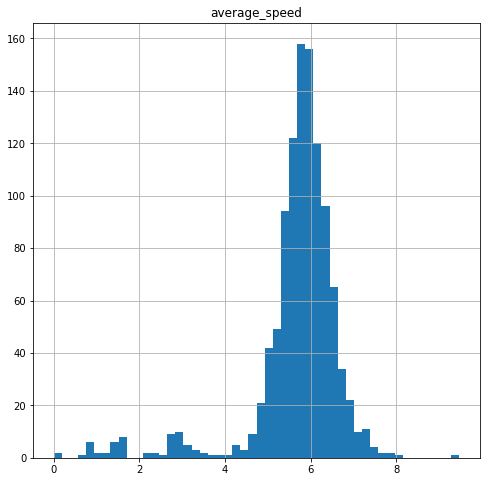

In [21]:
#Analyse histogram of all variables
DataCleaned.iloc[:,3:7].hist(bins=50,figsize=(8,8))

#### Scatter plot:
It is a mainstay of statistical visualization. It shows  the joint distribution of two variables using a cloud of points, where each point represents an observation in the dataset. This depiction allows the eye to infer a substantial amount of information about whether there is any meaningful relationship between them.

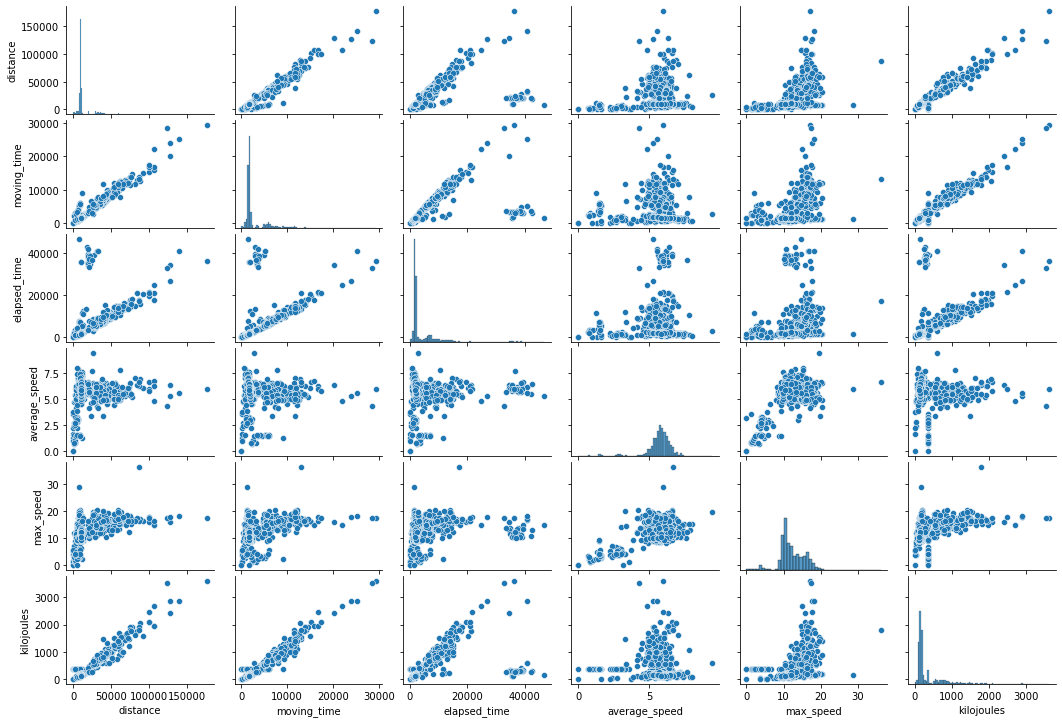

In [22]:
# Plotting Scatter Matrix
# just numeric excluding latitude and city
g=sns.pairplot(data=DataCleaned.iloc[:,:-4]);
g.fig.set_size_inches(15,10)


#
While the points are plotted in two dimensions, another dimension can be added to the plot by coloring the points according to a third variable. In seaborn, this is referred to as using a “hue semantic”, because the color of the point gains meaning:

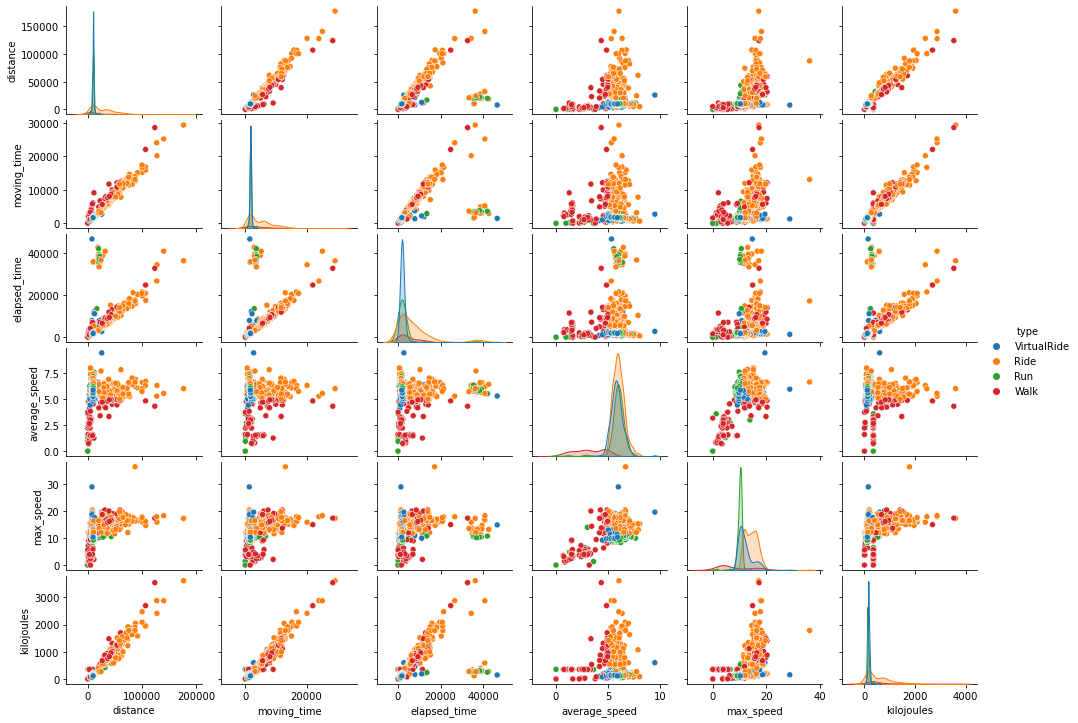

In [23]:
# Plotting Scatter Matrix
# just numeric excluding latitude and city
g=sns.pairplot(data=DataCleaned.iloc[:,:-4], hue="type",diag_kind="kde");
g.fig.set_size_inches(15,10)


As I explained above kudos is a relation of friendship so the more friends you have more kudos.

If you uploaded a ride on strava and no one saw it, did it really happened? 🤔

So let's have a look at my kudos for every ride over time

In [24]:
DataCleaned['start_date_local']>'2015-04-08 16:42:04'

0       False
1        True
2        True
3        True
4        True
        ...  
1086     True
1087     True
1088     True
1089     True
1090     True
Name: start_date_local, Length: 1091, dtype: bool

In [25]:
DataCleaned [DataCleaned['start_date_local']>'2017-01-01 11:12:04']

distance  moving_time  elapsed_time         type          start_date  \
220     9811.5         1907          2186         Ride 2017-01-23 21:16:38   
221     8910.2         1618          1771  VirtualRide 2017-01-24 06:43:35   
222    10442.0         1729          1991         Ride 2017-01-24 20:16:51   
223    10567.3         1959          2287         Ride 2017-01-25 08:22:28   
224    10855.0         2027          2330  VirtualRide 2017-01-27 06:37:00   
...        ...          ...           ...          ...                 ...   
1086   10283.8         1652          1942          Run 2019-07-02 22:36:31   
1087    9826.1         1742          2034  VirtualRide 2019-07-03 08:27:23   
1088   39854.6         8053          9362         Walk 2019-07-05 19:34:37   
1089   10274.9         1689          2213          Run 2019-07-14 22:55:52   
1090    9853.7         1675          1764  VirtualRide 2019-07-15 07:58:21   

        start_date_local  average_speed  max_speed  kilojoules  date_Start  \
220  2017-01-24 07:46:38          5.145       14.4       224.4  2017-01-23   
221  2017-01-24 17:13:35          5.507       10.2       195.0  2017-01-24   
222  2017-01-25 06:46:51          6.039       11.4       185.9  2017-01-24   
223  2017-01-25 18:52:28          5.394       11.0       217.6  2017-01-25   
224  2017-01-27 17:07:00          5.355       10.7       238.8  2017-01-27   
...                  ...            ...        ...         ...         ...   
1086 2019-07-03 08:06:31          6.225        9.9       115.7  2019-07-02   
1087 2019-07-03 17:57:23          5.641        9.8       139.7  2019-07-03   
1088 2019-07-06 05:04:37          4.949       16.1       820.5  2019-07-05   
1089 2019-07-15 08:25:52          6.083        9.2       114.0  2019-07-14   
1090 2019-07-15 17:28:21          5.883       10.3       112.9  2019-07-15   

     time_Start      city  s_lat   s_lon  e_lat   e_lon  
220    21:16:38  Adelaide -34.88  138.63 -34.92  138.58  
221    06:43:35  Adelaide -34.92  138.58 -34.88  138.63  
222    20:16:51  Adelaide -34.88  138.63 -34.92  138.58  
223    08:22:28  Adelaide -34.92  138.58 -34.88  138.63  
224    06:37:00  Adelaide -34.92  138.58 -34.88  138.63  
...         ...       ...    ...     ...    ...     ...  
1086   22:36:31  Adelaide -34.88  138.63 -34.92  138.58  
1087   08:27:23  Adelaide -34.92  138.58 -34.88  138.63  
1088   19:34:37  Adelaide -34.88  138.63 -34.88  138.63  
1089   22:55:52  Adelaide -34.88  138.63 -34.92  138.58  
1090   07:58:21  Adelaide -34.92  138.58 -34.88  138.63  

[871 rows x 16 columns]

In [26]:
DataCleanedfrom2017= DataCleaned [DataCleaned['start_date_local']>'2018-01-01 11:12:04']
DataCleanedfrom2017

distance  moving_time  elapsed_time         type          start_date  \
540     9680.7         1644          1769          Run 2018-01-02 21:07:12   
541     6318.2         1007          1007  VirtualRide 2018-01-03 07:09:16   
542    31705.4         5200          6909         Ride 2018-01-03 18:29:55   
543    20514.5         3295         37127         Ride 2018-01-03 21:23:48   
544    23667.1         3979         38416         Ride 2018-01-04 20:55:50   
...        ...          ...           ...          ...                 ...   
1086   10283.8         1652          1942          Run 2019-07-02 22:36:31   
1087    9826.1         1742          2034  VirtualRide 2019-07-03 08:27:23   
1088   39854.6         8053          9362         Walk 2019-07-05 19:34:37   
1089   10274.9         1689          2213          Run 2019-07-14 22:55:52   
1090    9853.7         1675          1764  VirtualRide 2019-07-15 07:58:21   

        start_date_local  average_speed  max_speed  kilojoules  date_Start  \
540  2018-01-03 07:37:12          5.889        9.8        95.5  2018-01-02   
541  2018-01-03 17:39:16          6.274        9.4       109.6  2018-01-03   
542  2018-01-04 04:59:55          6.097       14.0       612.0  2018-01-03   
543  2018-01-04 07:53:48          6.226       12.5       293.2  2018-01-03   
544  2018-01-05 07:25:50          5.948       11.9       314.6  2018-01-04   
...                  ...            ...        ...         ...         ...   
1086 2019-07-03 08:06:31          6.225        9.9       115.7  2019-07-02   
1087 2019-07-03 17:57:23          5.641        9.8       139.7  2019-07-03   
1088 2019-07-06 05:04:37          4.949       16.1       820.5  2019-07-05   
1089 2019-07-15 08:25:52          6.083        9.2       114.0  2019-07-14   
1090 2019-07-15 17:28:21          5.883       10.3       112.9  2019-07-15   

     time_Start      city  s_lat   s_lon  e_lat   e_lon  
540    21:07:12  Adelaide -34.88  138.63 -34.92  138.58  
541    07:09:16  Adelaide -34.91  138.61 -34.88  138.63  
542    18:29:55  Adelaide -34.88  138.63 -34.88  138.63  
543    21:23:48  Adelaide -34.88  138.63 -34.88  138.63  
544    20:55:50  Adelaide -34.88  138.63 -34.88  138.63  
...         ...       ...    ...     ...    ...     ...  
1086   22:36:31  Adelaide -34.88  138.63 -34.92  138.58  
1087   08:27:23  Adelaide -34.92  138.58 -34.88  138.63  
1088   19:34:37  Adelaide -34.88  138.63 -34.88  138.63  
1089   22:55:52  Adelaide -34.88  138.63 -34.92  138.58  
1090   07:58:21  Adelaide -34.92  138.58 -34.88  138.63  

[551 rows x 16 columns]

<AxesSubplot:xlabel='type'>

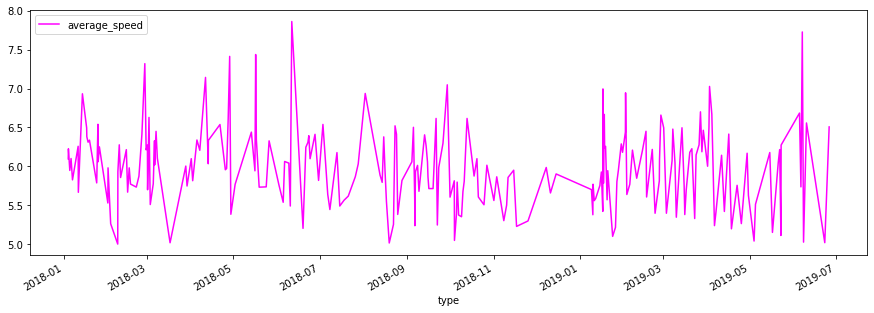

In [27]:
# visualise average_speed overtime

pd.pivot_table(DataCleanedfrom2017[DataCleanedfrom2017['type']=='Ride'],values='average_speed',index='start_date_local',aggfunc=np.mean).sort_index().plot(figsize=(15,5),xlabel='type',colormap='spring')

<AxesSubplot:xlabel='type'>

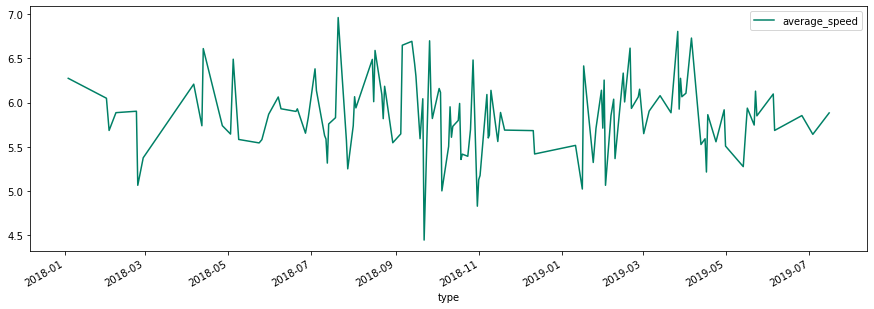

In [28]:
# visualise average_speed overtime

pd.pivot_table(DataCleanedfrom2017[DataCleanedfrom2017['type']=='VirtualRide'],values='average_speed',index='start_date_local',aggfunc=np.mean).sort_index().plot(figsize=(15,5),xlabel='type',colormap='summer')

<AxesSubplot:xlabel='type'>

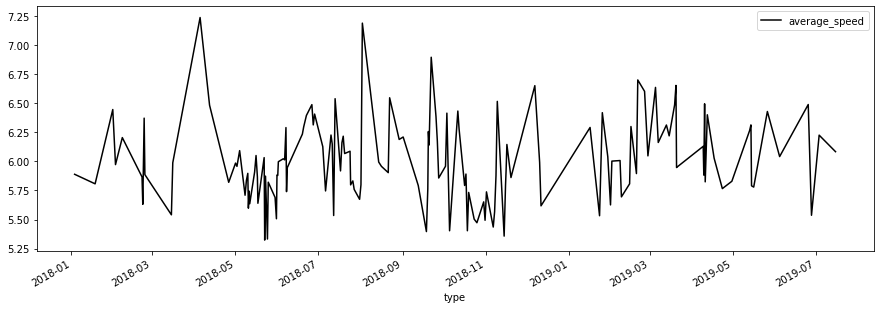

In [29]:
# visualise average_speed overtime

pd.pivot_table(DataCleanedfrom2017[DataCleanedfrom2017['type']=='Run'],values='average_speed',index='start_date_local',aggfunc=np.mean).sort_index().plot(figsize=(15,5),xlabel='type',colormap='copper')

<AxesSubplot:xlabel='type'>

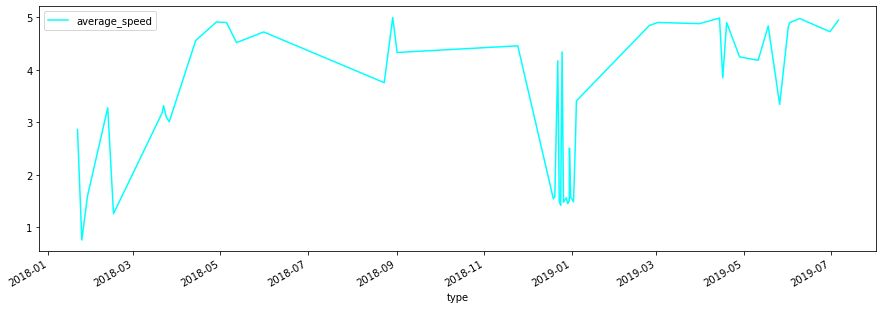

In [30]:
# visualise average_speed overtime

pd.pivot_table(DataCleanedfrom2017[DataCleanedfrom2017['type']=='Walk'],values='average_speed',index='start_date_local',aggfunc=np.mean).sort_index().plot(figsize=(15,5),xlabel='type',colormap='cool')

In [31]:
DataCleaned.drop(columns=['e_lon','e_lat','s_lat','s_lon','start_date','start_date_local'],axis=1,inplace=True)

In [32]:
DataCleaned.head(10)

distance  moving_time  elapsed_time         type  average_speed  max_speed  \
0    9789.1         1898          2057  VirtualRide          5.158       10.3   
1    9967.4         1840          2120  VirtualRide          5.417       15.2   
2   10022.0         1763          1958         Ride          5.685       15.6   
3    5227.2         1806          1815          Run          2.894        6.2   
4    9969.3         1859          2017  VirtualRide          5.363       14.9   
5    9966.0         1660          1763         Ride          6.004       15.5   
6   10135.7         1823          1891  VirtualRide          5.560       11.8   
7    5197.0         1799          1820         Walk          2.889        4.9   
8    5436.3         1912          1912         Walk          2.843        5.0   
9    9883.9         1691          1829         Ride          5.845       11.1   

   kilojoules  date_Start time_Start      city  
0  352.312766  2015-04-08   07:12:04  Adelaide  
1  352.312766  2015-04-21   07:46:30  Adelaide  
2  352.312766  2015-04-21   22:02:34  Adelaide  
3  352.312766  2015-04-22   02:47:45  Adelaide  
4  187.000000  2015-04-22   07:41:52  Adelaide  
5  176.900000  2015-04-22   21:51:09  Adelaide  
6  197.300000  2015-04-23   06:39:08  Adelaide  
7  352.312766  2015-04-25   05:07:02  Adelaide  
8  352.312766  2015-04-27   02:46:51  Adelaide  
9  181.900000  2015-04-27   21:47:39  Adelaide

 to check correlation matrix and pair plot again to check if much changed, since we are looking at a time where I did considerable more riding and longer rides and has much more friends connected.

Text(0.5, 1.0, 'Correlation Matrix Plot')

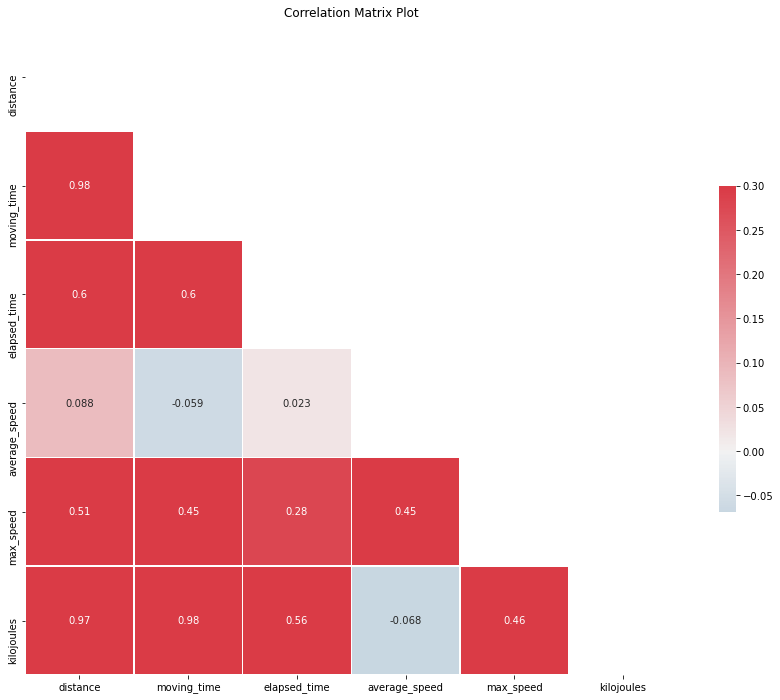

In [33]:
corr = DataCleaned.iloc[:,:].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15,12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(240, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.title('Correlation Matrix Plot')

Everything raise a bit and some droped and some moved significantly like max speed. Now lets plot again scatter matrix and check for potential drops or stay with those variables to train the model.

Regarding correlation now the strongest one is max_speed with 0.67.

Geographical coordinates there is no correlation. Close to zero.

Average speed is negatively correlated but not very strong.

Elevation low is weakly correlated.


# Elimininate features that are very close to each other

In [34]:
DataCleaned.drop(columns=['elapsed_time','kilojoules'],axis=1,inplace=True)



Potentially I could drop distance which is very correlated to moving time

In [35]:
DataCleaned['city'].unique()

array(['Adelaide', 'Sao_Paulo', 'Makassar', 'Melbourne'], dtype=object)

In [36]:
city=DataCleaned.groupby('city').count()


In [37]:
city['distance'][0]=500
city['distance'][1]=300
city['distance'][2]=100
city['distance'][3]=50

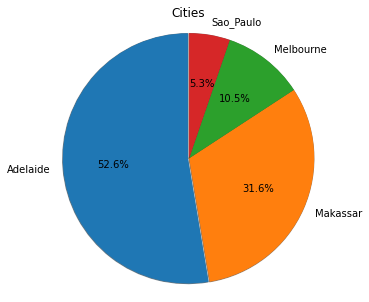

In [38]:

explode = (0.1, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
fig1, ax1 = plt.subplots(figsize=(5, 5))

ax1.pie(city['distance'], explode=explode, labels=city.index, autopct='%1.1f%%',
        shadow=True, startangle=90,radius=10)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

ax1.set_title("Cities")
plt.show()

#  Feature engineering and selection

Now that we have explored the trends and relationships within the data, we can work on engineering a set of features for our models. We can use the results of the EDA to inform this feature engineering. In particular, we learned the following from EDA which can help us in engineering/selecting features:

Before we get any further, we should define what feature engineering and selection are! These definitions are informal and have considerable overlap, but I like to think of them as two separate processes:

* Feature Engineering: The process of taking raw data and extracting or creating new features that allow a machine learning model to learn a mapping beween these features and the target. This might mean taking transformations of variables, such as scalling variables or dummy variables for categorical data, so they can be used in a model. Generally, I think of feature engineering as adding additional features derived from the raw data.

* Feature Selection: The process of choosing the most relevant features in your data. "Most relevant" can depend on many factors, but it might be something as simple as the highest correlation with the target, or the features with the most variance. In feature selection, we remove features that do not help our model learn the relationship between features and the target. This can help the model generalize better to new data and results in a more interpretable model. Generally, I think of feature selection as subtracting features so we are left with only those that are most important.
    
Feature engineering and selection are iterative processes that will usually require several attempts to get right.

Feature engineering and selection often has the highest returns on time invested in a machine learning problem. It can take quite a while to get right, but is often more important than the exact algorithm and hyperparameters used for the model. If we don't feed the model the correct data, then we are setting it up to fail and we should not expect it to learn!

In this project, we will take the following steps for feature engineering:

- Standard Scale features for better training
- Create dummy variables for categorical (city)

For feature selection, we will do the following:

- Drop all not relevant features we already identified in correlation analysis and cleaning
- Remove non important features (done later with the random forest model)

Let's get started


reference: Template addaped from <a href="https://github.com/WillKoehrsen/machine-learning-project-walkthrough/blob/master/Machine%20Learning%20Project%20Part%201.ipynb">from</a>

In [39]:
# check all current selected variables
DataFeatureEngineered=DataCleaned.copy()
DataFeatureEngineered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1091 entries, 0 to 1090
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   distance       1091 non-null   float64
 1   moving_time    1091 non-null   int64  
 2   type           1091 non-null   object 
 3   average_speed  1091 non-null   float64
 4   max_speed      1091 non-null   float64
 5   date_Start     1091 non-null   object 
 6   time_Start     1091 non-null   object 
 7   city           1091 non-null   object 
dtypes: float64(3), int64(1), object(4)
memory usage: 68.3+ KB


Lets first

 - drop coordinates and time rows
 - create city dummy variables
 - Split test and trainset
 - Scale variables


In [40]:
DataFeatureEngineered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1091 entries, 0 to 1090
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   distance       1091 non-null   float64
 1   moving_time    1091 non-null   int64  
 2   type           1091 non-null   object 
 3   average_speed  1091 non-null   float64
 4   max_speed      1091 non-null   float64
 5   date_Start     1091 non-null   object 
 6   time_Start     1091 non-null   object 
 7   city           1091 non-null   object 
dtypes: float64(3), int64(1), object(4)
memory usage: 68.3+ KB


In [41]:
DataFeatureEngineered.head(10)

distance  moving_time         type  average_speed  max_speed  date_Start  \
0    9789.1         1898  VirtualRide          5.158       10.3  2015-04-08   
1    9967.4         1840  VirtualRide          5.417       15.2  2015-04-21   
2   10022.0         1763         Ride          5.685       15.6  2015-04-21   
3    5227.2         1806          Run          2.894        6.2  2015-04-22   
4    9969.3         1859  VirtualRide          5.363       14.9  2015-04-22   
5    9966.0         1660         Ride          6.004       15.5  2015-04-22   
6   10135.7         1823  VirtualRide          5.560       11.8  2015-04-23   
7    5197.0         1799         Walk          2.889        4.9  2015-04-25   
8    5436.3         1912         Walk          2.843        5.0  2015-04-27   
9    9883.9         1691         Ride          5.845       11.1  2015-04-27   

  time_Start      city  
0   07:12:04  Adelaide  
1   07:46:30  Adelaide  
2   22:02:34  Adelaide  
3   02:47:45  Adelaide  
4   07:41:52  Adelaide  
5   21:51:09  Adelaide  
6   06:39:08  Adelaide  
7   05:07:02  Adelaide  
8   02:46:51  Adelaide  
9   21:47:39  Adelaide

In [42]:
x = DataFeatureEngineered['distance'] #returns a numpy array
DataFeatureEngineered['distanceN']=(x-x.min())/(x.max()-x.min())+1

In [43]:
DataFeatureEngineered

distance  moving_time         type  average_speed  max_speed  \
0       9789.1         1898  VirtualRide          5.158       10.3   
1       9967.4         1840  VirtualRide          5.417       15.2   
2      10022.0         1763         Ride          5.685       15.6   
3       5227.2         1806          Run          2.894        6.2   
4       9969.3         1859  VirtualRide          5.363       14.9   
...        ...          ...          ...            ...        ...   
1086   10283.8         1652          Run          6.225        9.9   
1087    9826.1         1742  VirtualRide          5.641        9.8   
1088   39854.6         8053         Walk          4.949       16.1   
1089   10274.9         1689          Run          6.083        9.2   
1090    9853.7         1675  VirtualRide          5.883       10.3   

      date_Start time_Start      city  distanceN  
0     2015-04-08   07:12:04  Adelaide   1.055386  
1     2015-04-21   07:46:30  Adelaide   1.056395  
2     2015-04-21   22:02:34  Adelaide   1.056704  
3     2015-04-22   02:47:45  Adelaide   1.029575  
4     2015-04-22   07:41:52  Adelaide   1.056406  
...          ...        ...       ...        ...  
1086  2019-07-02   22:36:31  Adelaide   1.058185  
1087  2019-07-03   08:27:23  Adelaide   1.055595  
1088  2019-07-05   19:34:37  Adelaide   1.225495  
1089  2019-07-14   22:55:52  Adelaide   1.058135  
1090  2019-07-15   07:58:21  Adelaide   1.055752  

[1091 rows x 9 columns]

In [44]:
MET = {'Type': ['Ride', 'VirtualRide','Run','Walk'], 'met': [14, 11,10,7]}
MET = pd.DataFrame(data=MET)
#MET =MET.set_index('Type')
MET

Type  met
0         Ride   14
1  VirtualRide   11
2          Run   10
3         Walk    7

In [45]:
DataFeatureEngineered['moving_time'][1]/360

5.111111111111111

In [46]:
DataFeatureEngineered['CaloriesLost']= 0
for i in range(len(DataFeatureEngineered)):
    DataFeatureEngineered['CaloriesLost'][i]=(DataFeatureEngineered['moving_time'][i]/360)* MET[MET['Type']==DataFeatureEngineered['type'][i]]['met'].values[0]*    DataFeatureEngineered['distanceN'][i]*60

C:\Users\Salma Kastalli\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [47]:
from datetime import date, datetime

Y = 2000 # dummy leap year to allow input X-02-29 (leap day)
seasons = [('winter', (date(Y,  1,  1),  date(Y,  3, 20))),
           ('spring', (date(Y,  3, 21),  date(Y,  6, 20))),
           ('summer', (date(Y,  6, 21),  date(Y,  9, 22))),
           ('autumn', (date(Y,  9, 23),  date(Y, 12, 20))),
           ('winter', (date(Y, 12, 21),  date(Y, 12, 31)))]

def get_season(now):
    if isinstance(now, datetime):
        now = now.date()
    now = now.replace(year=Y)
    return next(season for season, (start, end) in seasons
                if start <= now <= end)

from sys import stdout


def get_part_of_day(hour):
    return (
        "morning" if 5 <= hour <= 11
        else
        "afternoon" if 12 <= hour <= 17
        else
        "evening" if 18 <= hour <= 22
        else
        "night"
    )

In [48]:
from numpy import nan
DataFeatureEngineered['Days_till_the last_activity']= 0
DataFeatureEngineered['Previous_activity']='Ride'
DataFeatureEngineered['Previous_ColoryLoss']=0
DataFeatureEngineered['Before_Previous_activity']='Ride'
DataFeatureEngineered['Season']=get_season(DataFeatureEngineered['date_Start'][len(DataFeatureEngineered)-1])
DataFeatureEngineered['Part_of_day']=get_part_of_day(DataFeatureEngineered['time_Start'][len(DataFeatureEngineered)-1].hour)
for i in range(len(DataFeatureEngineered)-1):
    DataFeatureEngineered['Season'][i]=get_season(DataFeatureEngineered['date_Start'][i])
    DataFeatureEngineered['Part_of_day'][i]=get_part_of_day(DataFeatureEngineered['time_Start'][i].hour)
    DataFeatureEngineered['Days_till_the last_activity'][i+1]=(DataFeatureEngineered['date_Start'][i+1]
                                                               -DataFeatureEngineered['date_Start'][i]).days
    DataFeatureEngineered['Previous_activity'][i+1]= DataFeatureEngineered['type'][i]
    DataFeatureEngineered['Previous_ColoryLoss'][i+1]= DataFeatureEngineered['CaloriesLost'][i]
    DataFeatureEngineered['Part_of_day'][i]=get_part_of_day(DataFeatureEngineered['time_Start'][i].hour)
    
    if(i>0):
        DataFeatureEngineered['Before_Previous_activity'][i+2]= DataFeatureEngineered['type'][i]

   
    

C:\Users\Salma Kastalli\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\Salma Kastalli\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Salma Kastalli\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versu

In [49]:
DataFeatureEngineered

distance  moving_time         type  average_speed  max_speed  \
0       9789.1         1898  VirtualRide          5.158       10.3   
1       9967.4         1840  VirtualRide          5.417       15.2   
2      10022.0         1763         Ride          5.685       15.6   
3       5227.2         1806          Run          2.894        6.2   
4       9969.3         1859  VirtualRide          5.363       14.9   
...        ...          ...          ...            ...        ...   
1086   10283.8         1652          Run          6.225        9.9   
1087    9826.1         1742  VirtualRide          5.641        9.8   
1088   39854.6         8053         Walk          4.949       16.1   
1089   10274.9         1689          Run          6.083        9.2   
1090    9853.7         1675  VirtualRide          5.883       10.3   

      date_Start time_Start      city  distanceN  CaloriesLost  \
0     2015-04-08   07:12:04  Adelaide   1.055386          3672   
1     2015-04-21   07:46:30  Adelaide   1.056395          3563   
2     2015-04-21   22:02:34  Adelaide   1.056704          4346   
3     2015-04-22   02:47:45  Adelaide   1.029575          3099   
4     2015-04-22   07:41:52  Adelaide   1.056406          3600   
...          ...        ...       ...        ...           ...   
1086  2019-07-02   22:36:31  Adelaide   1.058185          2913   
1087  2019-07-03   08:27:23  Adelaide   1.055595          3371   
1088  2019-07-05   19:34:37  Adelaide   1.225495         11513   
1089  2019-07-14   22:55:52  Adelaide   1.058135          2978   
1090  2019-07-15   07:58:21  Adelaide   1.055752          3242   

      Days_till_the last_activity Previous_activity  Previous_ColoryLoss  \
0                               0              Ride                    0   
1                              13       VirtualRide                 3672   
2                               0       VirtualRide                 3563   
3                               1              Ride                 4346   
4                               0               Run                 3099   
...                           ...               ...                  ...   
1086                            3              Walk                 7594   
1087                            1               Run                 2913   
1088                            2       VirtualRide                 3371   
1089                            9              Walk                11513   
1090                            1               Run                 2978   

     Before_Previous_activity  Season Part_of_day  
0                        Ride  spring     morning  
1                        Ride  spring     morning  
2                        Ride  spring     evening  
3                 VirtualRide  spring       night  
4                        Ride  spring     morning  
...                       ...     ...         ...  
1086                      Run  summer     evening  
1087                     Walk  summer     morning  
1088                      Run  summer     evening  
1089              VirtualRide  summer     evening  
1090                     Walk  summer     morning  

[1091 rows x 16 columns]

In [50]:
Part_of_day=DataFeatureEngineered.groupby('Part_of_day').count()
Part_of_day

distance  moving_time  type  average_speed  max_speed  \
Part_of_day                                                          
afternoon           1            1     1              1          1   
evening           655          655   655            655        655   
morning           396          396   396            396        396   
night              39           39    39             39         39   

             date_Start  time_Start  city  distanceN  CaloriesLost  \
Part_of_day                                                          
afternoon             1           1     1          1             1   
evening             655         655   655        655           655   
morning             396         396   396        396           396   
night                39          39    39         39            39   

             Days_till_the last_activity  Previous_activity  \
Part_of_day                                                   
afternoon                              1                  1   
evening                              655                655   
morning                              396                396   
night                                 39                 39   

             Previous_ColoryLoss  Before_Previous_activity  Season  
Part_of_day                                                         
afternoon                      1                         1       1  
evening                      655                       655     655  
morning                      396                       396     396  
night                         39                        39      39

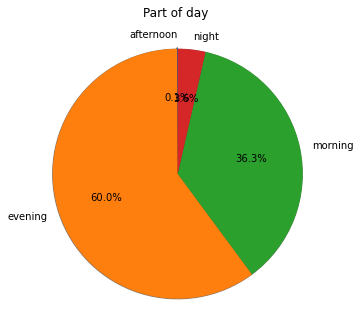

In [51]:

explode = (0.1, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
fig1, ax1 = plt.subplots(figsize=(5, 5))

ax1.pie(Part_of_day['distance'], explode=explode, labels=Part_of_day.index, autopct='%1.1f%%',
        shadow=True, startangle=90,radius=10)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title("Part of day \n")

plt.show()

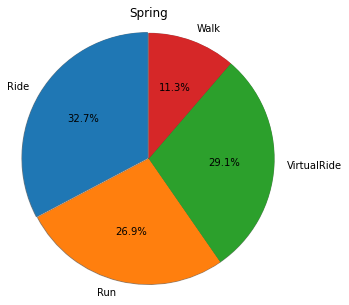

In [52]:
sea=DataFeatureEngineered.groupby('Season')
spr=sea.get_group('spring').groupby('Previous_activity').count()
explode = (0.1, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
fig1, ax1 = plt.subplots(figsize=(5, 5))

ax1.pie(spr['distance'], explode=explode, labels=spr.index, autopct='%1.1f%%',
        shadow=True, startangle=90,radius=10)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

ax1.set_title("Spring")
plt.show()

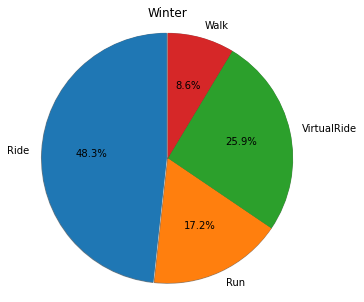

In [53]:
spr=sea.get_group('winter').groupby('Previous_activity').count()
explode = (0.1, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
fig1, ax1 = plt.subplots(figsize=(5, 5))

ax1.pie(spr['distance'], explode=explode, labels=spr.index, autopct='%1.1f%%',
        shadow=True, startangle=90,radius=10)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

ax1.set_title("Winter")
plt.show()

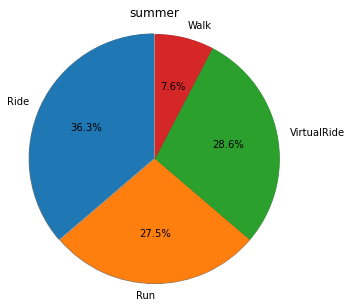

In [54]:
spr=sea.get_group('summer').groupby('Previous_activity').count()
explode = (0.1, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
fig1, ax1 = plt.subplots(figsize=(5, 5))

ax1.pie(spr['distance'], explode=explode, labels=spr.index, autopct='%1.1f%%',
        shadow=True, startangle=90,radius=10)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

ax1.set_title("summer")
plt.show()

In [55]:
DataFeatureEngineered[DataFeatureEngineered['Season']=='summer']

distance  moving_time         type  average_speed  max_speed  \
35      8382.0         1400          Run          5.987        9.8   
36      9942.1         2156         Walk          4.611       13.3   
37     13939.8         2780  VirtualRide          5.014       12.5   
38      4050.5          800          Run          5.063       10.8   
39      9866.7         1905         Ride          5.179       11.1   
...        ...          ...          ...            ...        ...   
1086   10283.8         1652          Run          6.225        9.9   
1087    9826.1         1742  VirtualRide          5.641        9.8   
1088   39854.6         8053         Walk          4.949       16.1   
1089   10274.9         1689          Run          6.083        9.2   
1090    9853.7         1675  VirtualRide          5.883       10.3   

      date_Start time_Start      city  distanceN  CaloriesLost  \
35    2015-07-24   22:56:21  Adelaide   1.047425          2443   
36    2015-07-27   22:07:53  Adelaide   1.056252          2656   
37    2015-07-28   07:47:48  Adelaide   1.078870          5498   
38    2015-07-28   09:02:49  Adelaide   1.022917          1363   
39    2015-07-29   21:56:16  Adelaide   1.055825          4693   
...          ...        ...       ...        ...           ...   
1086  2019-07-02   22:36:31  Adelaide   1.058185          2913   
1087  2019-07-03   08:27:23  Adelaide   1.055595          3371   
1088  2019-07-05   19:34:37  Adelaide   1.225495         11513   
1089  2019-07-14   22:55:52  Adelaide   1.058135          2978   
1090  2019-07-15   07:58:21  Adelaide   1.055752          3242   

      Days_till_the last_activity Previous_activity  Previous_ColoryLoss  \
35                             70              Walk                 2731   
36                              3               Run                 2443   
37                              1              Walk                 2656   
38                              0       VirtualRide                 5498   
39                              1               Run                 1363   
...                           ...               ...                  ...   
1086                            3              Walk                 7594   
1087                            1               Run                 2913   
1088                            2       VirtualRide                 3371   
1089                            9              Walk                11513   
1090                            1               Run                 2978   

     Before_Previous_activity  Season Part_of_day  
35                VirtualRide  summer     evening  
36                       Walk  summer     evening  
37                        Run  summer     morning  
38                       Walk  summer     morning  
39                VirtualRide  summer     evening  
...                       ...     ...         ...  
1086                      Run  summer     evening  
1087                     Walk  summer     morning  
1088                      Run  summer     evening  
1089              VirtualRide  summer     evening  
1090                     Walk  summer     morning  

[262 rows x 16 columns]

In [56]:
DataFeatureEngineered.drop(columns=['city','CaloriesLost','distanceN','date_Start','time_Start','distance','average_speed','max_speed'],axis=1,inplace=True)

In [57]:
DataFeatureEngineered.columns

Index(['moving_time', 'type', 'Days_till_the last_activity',
       'Previous_activity', 'Previous_ColoryLoss', 'Before_Previous_activity',
       'Season', 'Part_of_day'],
      dtype='object')

In [58]:
DataFeatureEngineered.head(20)

moving_time         type  Days_till_the last_activity Previous_activity  \
0          1898  VirtualRide                            0              Ride   
1          1840  VirtualRide                           13       VirtualRide   
2          1763         Ride                            0       VirtualRide   
3          1806          Run                            1              Ride   
4          1859  VirtualRide                            0               Run   
5          1660         Ride                            0       VirtualRide   
6          1823  VirtualRide                            1              Ride   
7          1799         Walk                            2       VirtualRide   
8          1912         Walk                            2              Walk   
9          1691         Ride                            0              Walk   
10         1818  VirtualRide                            1              Ride   
11         1987         Ride                            0       VirtualRide   
12         1871          Run                            1              Ride   
13         1303  VirtualRide                            0               Run   
14         1013         Ride                            0       VirtualRide   
15          984          Run                            0              Ride   
16          870         Ride                            0               Run   
17         1538  VirtualRide                            1              Ride   
18         1799         Walk                            1       VirtualRide   
19         1488         Ride                            2              Walk   

    Previous_ColoryLoss Before_Previous_activity  Season Part_of_day  
0                     0                     Ride  spring     morning  
1                  3672                     Ride  spring     morning  
2                  3563                     Ride  spring     evening  
3                  4346              VirtualRide  spring       night  
4                  3099                     Ride  spring     morning  
5                  3600                      Run  spring     evening  
6                  4091              VirtualRide  spring     morning  
7                  3533                     Ride  spring     morning  
8                  2160              VirtualRide  spring       night  
9                  2299                     Walk  spring     evening  
10                 4166                     Walk  spring     morning  
11                 3518                     Ride  spring     evening  
12                 4938              VirtualRide  spring       night  
13                 3217                     Ride  spring     morning  
14                 2494                      Run  spring     morning  
15                 2456              VirtualRide  spring     evening  
16                 1695                     Ride  spring       night  
17                 2085                      Run  spring     morning  
18                 2959                     Ride  spring       night  
19                 2163              VirtualRide  spring     evening

In [59]:
DataFeatureEngineeredselect=DataFeatureEngineered[['type','moving_time','Previous_ColoryLoss']]
DataFeatureEngineeredselect

type  moving_time  Previous_ColoryLoss
0     VirtualRide         1898                    0
1     VirtualRide         1840                 3672
2            Ride         1763                 3563
3             Run         1806                 4346
4     VirtualRide         1859                 3099
...           ...          ...                  ...
1086          Run         1652                 7594
1087  VirtualRide         1742                 2913
1088         Walk         8053                 3371
1089          Run         1689                11513
1090  VirtualRide         1675                 2978

[1091 rows x 3 columns]

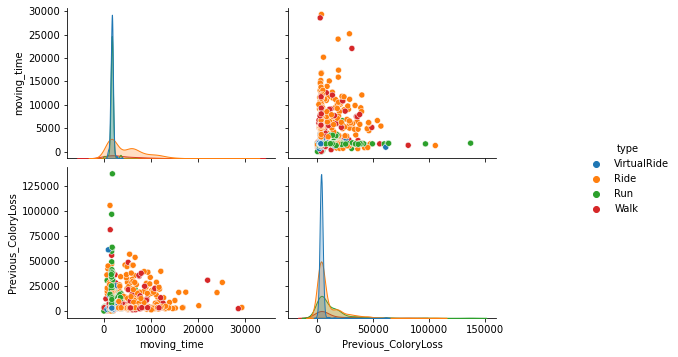

In [60]:
# Plotting Scatter Matrix
# just numeric excluding latitude and city
g=sns.pairplot(data=DataFeatureEngineeredselect, hue="type",diag_kind="kde");
g.fig.set_size_inches(10,5)

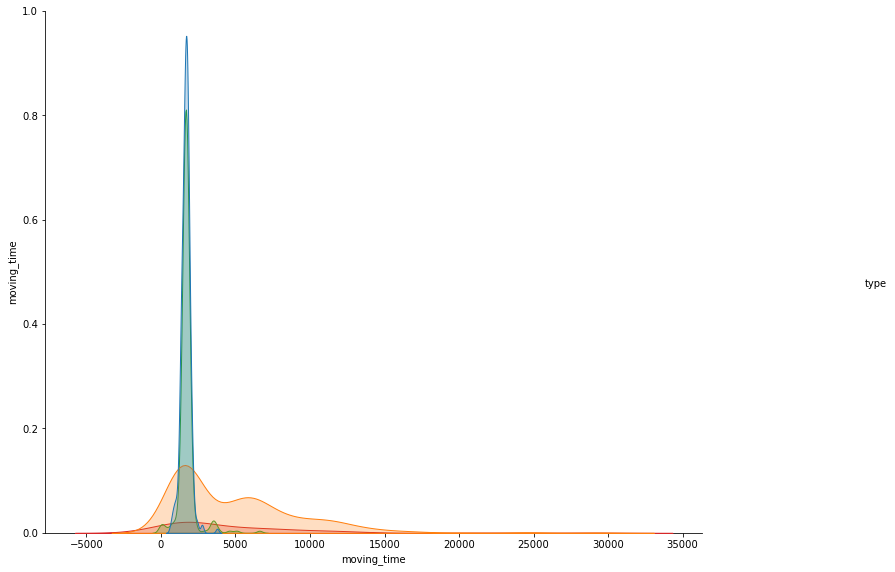

In [61]:
DataFeatureEngineeredselect=DataFeatureEngineered[['type','moving_time']]
g=sns.pairplot(data=DataFeatureEngineeredselect, hue="type",diag_kind="kde");
g.fig.set_size_inches(15,10)

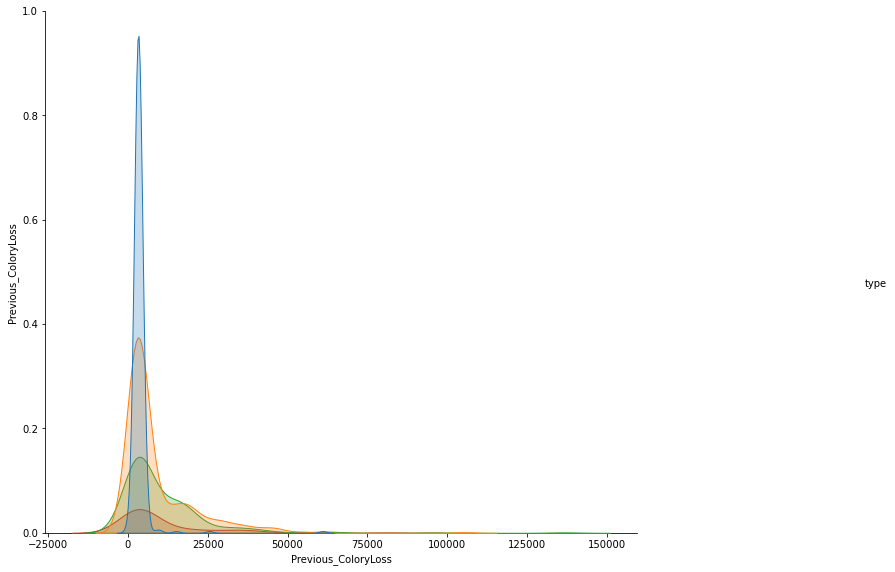

In [62]:
DataFeatureEngineeredselect=DataFeatureEngineered[['type','Previous_ColoryLoss']]
g=sns.pairplot(data=DataFeatureEngineeredselect, hue="type",diag_kind="kde");
g.fig.set_size_inches(15,10)

In [63]:
def create_dummy(data,col,drop_main=False):
    result = pd.concat([data,pd.get_dummies(data[col])],axis=1,sort=False)
    if drop_main==True:
        result=result.drop(columns=[col])
    return result

In [64]:
DataFeatureEngineered=create_dummy(DataFeatureEngineered,'Season',drop_main=False)
DataFeatureEngineered=create_dummy(DataFeatureEngineered,'Part_of_day',drop_main=False)

In [65]:
DataFeatureEngineered=pd.get_dummies(DataFeatureEngineered, columns=['Previous_activity'])
DataFeatureEngineered=pd.get_dummies(DataFeatureEngineered, columns=['Before_Previous_activity'])

In [66]:
DataFeatureEngineered.drop(columns=['Season','Part_of_day'],axis=1,inplace=True)

In [67]:
DataFeatureEngineered.head(20)

moving_time         type  Days_till_the last_activity  \
0          1898  VirtualRide                            0   
1          1840  VirtualRide                           13   
2          1763         Ride                            0   
3          1806          Run                            1   
4          1859  VirtualRide                            0   
5          1660         Ride                            0   
6          1823  VirtualRide                            1   
7          1799         Walk                            2   
8          1912         Walk                            2   
9          1691         Ride                            0   
10         1818  VirtualRide                            1   
11         1987         Ride                            0   
12         1871          Run                            1   
13         1303  VirtualRide                            0   
14         1013         Ride                            0   
15          984          Run                            0   
16          870         Ride                            0   
17         1538  VirtualRide                            1   
18         1799         Walk                            1   
19         1488         Ride                            2   

    Previous_ColoryLoss  autumn  spring  summer  winter  afternoon  evening  \
0                     0       0       1       0       0          0        0   
1                  3672       0       1       0       0          0        0   
2                  3563       0       1       0       0          0        1   
3                  4346       0       1       0       0          0        0   
4                  3099       0       1       0       0          0        0   
5                  3600       0       1       0       0          0        1   
6                  4091       0       1       0       0          0        0   
7                  3533       0       1       0       0          0        0   
8                  2160       0       1       0       0          0        0   
9                  2299       0       1       0       0          0        1   
10                 4166       0       1       0       0          0        0   
11                 3518       0       1       0       0          0        1   
12                 4938       0       1       0       0          0        0   
13                 3217       0       1       0       0          0        0   
14                 2494       0       1       0       0          0        0   
15                 2456       0       1       0       0          0        1   
16                 1695       0       1       0       0          0        0   
17                 2085       0       1       0       0          0        0   
18                 2959       0       1       0       0          0        0   
19                 2163       0       1       0       0          0        1   

    morning  night  Previous_activity_Ride  Previous_activity_Run  \
0         1      0                       1                      0   
1         1      0                       0                      0   
2         0      0                       0                      0   
3         0      1                       1                      0   
4         1      0                       0                      1   
5         0      0                       0                      0   
6         1      0                       1                      0   
7         1      0                       0                      0   
8         0      1                       0                      0   
9         0      0                       0                      0   
10        1      0                       1                      0   
11        0      0                       0                      0   
12        0      1                       1                      0   
13        1      0                       0                      1   
14        1      0         

Text(0.5, 1.0, 'Correlation Matrix Plot')

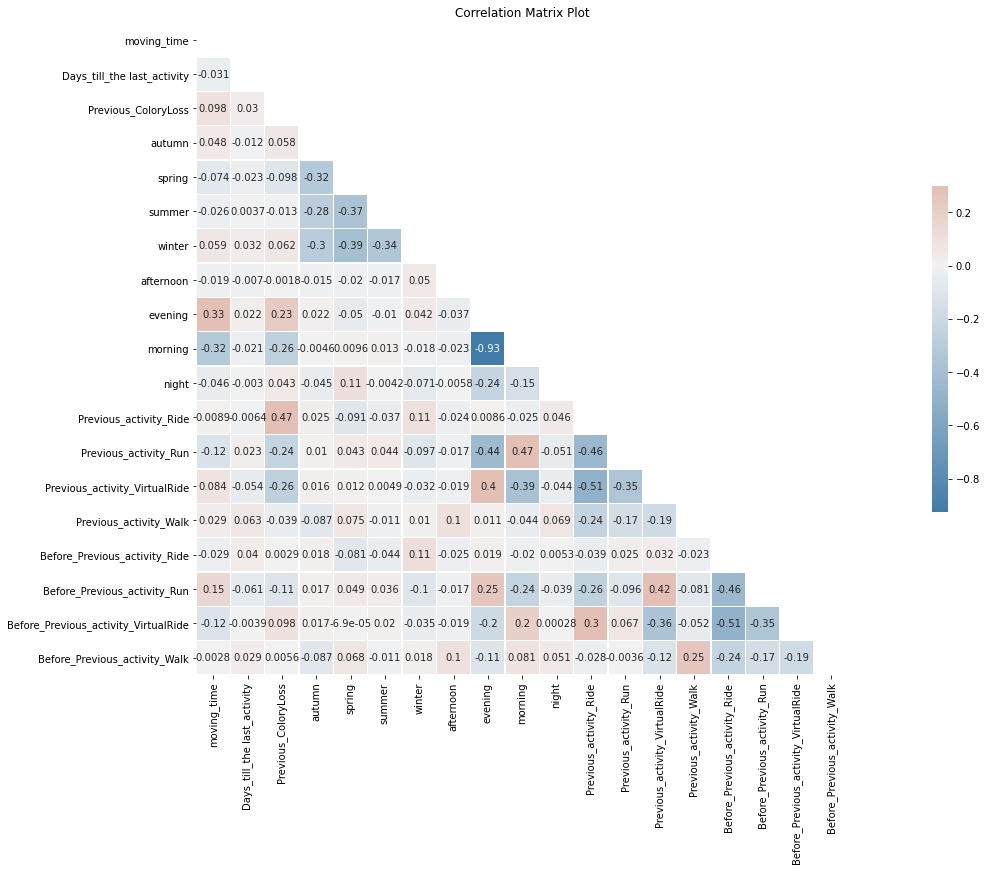

In [68]:
corr =DataFeatureEngineered.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(30,12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(240, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.title('Correlation Matrix Plot')

In [69]:
values=DataFeatureEngineered['type'].values
values

array(['VirtualRide', 'VirtualRide', 'Ride', ..., 'Walk', 'Run',
       'VirtualRide'], dtype=object)

In [70]:
# integer encode
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)


In [71]:
arrr=[]
for i in range(len(integer_encoded)):
    arr=[]
    arr.append(integer_encoded[i])
    arrr.append(arr)


In [72]:
y = np.asarray(arrr)
y

array([[2],
       [2],
       [0],
       ...,
       [3],
       [1],
       [2]])

In [73]:
# split sets
from sklearn.model_selection import train_test_split
X = DataFeatureEngineered.drop('type',axis=1).values
X


array([[ 1898,     0,     0, ...,     0,     0,     0],
       [ 1840,    13,  3672, ...,     0,     0,     0],
       [ 1763,     0,  3563, ...,     0,     0,     0],
       ...,
       [ 8053,     2,  3371, ...,     1,     0,     0],
       [ 1689,     9, 11513, ...,     0,     1,     0],
       [ 1675,     1,  2978, ...,     0,     0,     1]], dtype=int64)

In [74]:
DataFeatureEngineered.columns[1:]

Index(['type', 'Days_till_the last_activity', 'Previous_ColoryLoss', 'autumn',
       'spring', 'summer', 'winter', 'afternoon', 'evening', 'morning',
       'night', 'Previous_activity_Ride', 'Previous_activity_Run',
       'Previous_activity_VirtualRide', 'Previous_activity_Walk',
       'Before_Previous_activity_Ride', 'Before_Previous_activity_Run',
       'Before_Previous_activity_VirtualRide',
       'Before_Previous_activity_Walk'],
      dtype='object')

In [75]:
feature_cols=DataFeatureEngineered.drop('type',axis=1).columns
feature_cols

Index(['moving_time', 'Days_till_the last_activity', 'Previous_ColoryLoss',
       'autumn', 'spring', 'summer', 'winter', 'afternoon', 'evening',
       'morning', 'night', 'Previous_activity_Ride', 'Previous_activity_Run',
       'Previous_activity_VirtualRide', 'Previous_activity_Walk',
       'Before_Previous_activity_Ride', 'Before_Previous_activity_Run',
       'Before_Previous_activity_VirtualRide',
       'Before_Previous_activity_Walk'],
      dtype='object')

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

The first one the error was quite high and the last 2 were not far off if you round them
lets calculate mean squared error for the training and test set

# Establish a baseline 

Now it is important to starting evaluating the metric with all features and stablish a baseline for analysis of the results and then do some more feature engineering as well as hyperparameter tunning

for a regression model the performance metris is rmse <a href="https://en.wikipedia.org/wiki/Root-mean-square_deviation">(root mean squared error)</a>



Lets calculate it for a non regularised plain Linear Regression first and calculate rmse for train and test

<a href="https://en.wikipedia.org/wiki/Regularization_(mathematics)">Regularization reference</a> 
                          

In [77]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [78]:
# Begin by importing all necessary libraries
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.linear_model import LinearRegression

In [79]:
SVC_model = svm.SVC()
# KNN model requires you to specify n_neighbors,
# the number of points the classifier will look at to determine what class a new point belongs to
KNN_model = KNeighborsClassifier(n_neighbors=5)
lr = LinearRegression()

In [80]:
# train model
SVC_model.fit(X_train, y_train)
KNN_model.fit(X_train, y_train)
lr.fit(X_train,y_train)

C:\Users\Salma Kastalli\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Salma Kastalli\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


LinearRegression()

In [81]:
SVC_prediction = SVC_model.predict(X_test)
KNN_prediction = KNN_model.predict(X_test)


In [82]:
# Accuracy score is the simplest way to evaluate
print('The SVC_prediction accuracy_score',accuracy_score(SVC_prediction, y_test))
print('The KNN_prediction accuracy_score',accuracy_score(KNN_prediction, y_test))


The SVC_prediction accuracy_score 0.5640243902439024
The KNN_prediction accuracy_score 0.5792682926829268


In [83]:
# But Confusion Matrix and Classification Report give more details about performance
print(confusion_matrix(SVC_prediction, y_test))
print(classification_report(KNN_prediction, y_test))

[[77 10  1 13]
 [ 9 30  1  0]
 [43 52 78 14]
 [ 0  0  0  0]]
              precision    recall  f1-score   support

           0       0.70      0.62      0.66       144
           1       0.60      0.64      0.62        86
           2       0.55      0.51      0.53        86
           3       0.04      0.08      0.05        12

    accuracy                           0.58       328
   macro avg       0.47      0.46      0.46       328
weighted avg       0.61      0.58      0.59       328



In [84]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [85]:
# Model Accuracy, how often is the classifier correct?
import sklearn.metrics as metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6829268292682927


In [86]:
from sklearn.tree import export_graphviz
from six import StringIO
import graphviz
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"


from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['ride','run','VirtualRide','walk'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  


In [87]:
graph.write_png('pic.png')


True

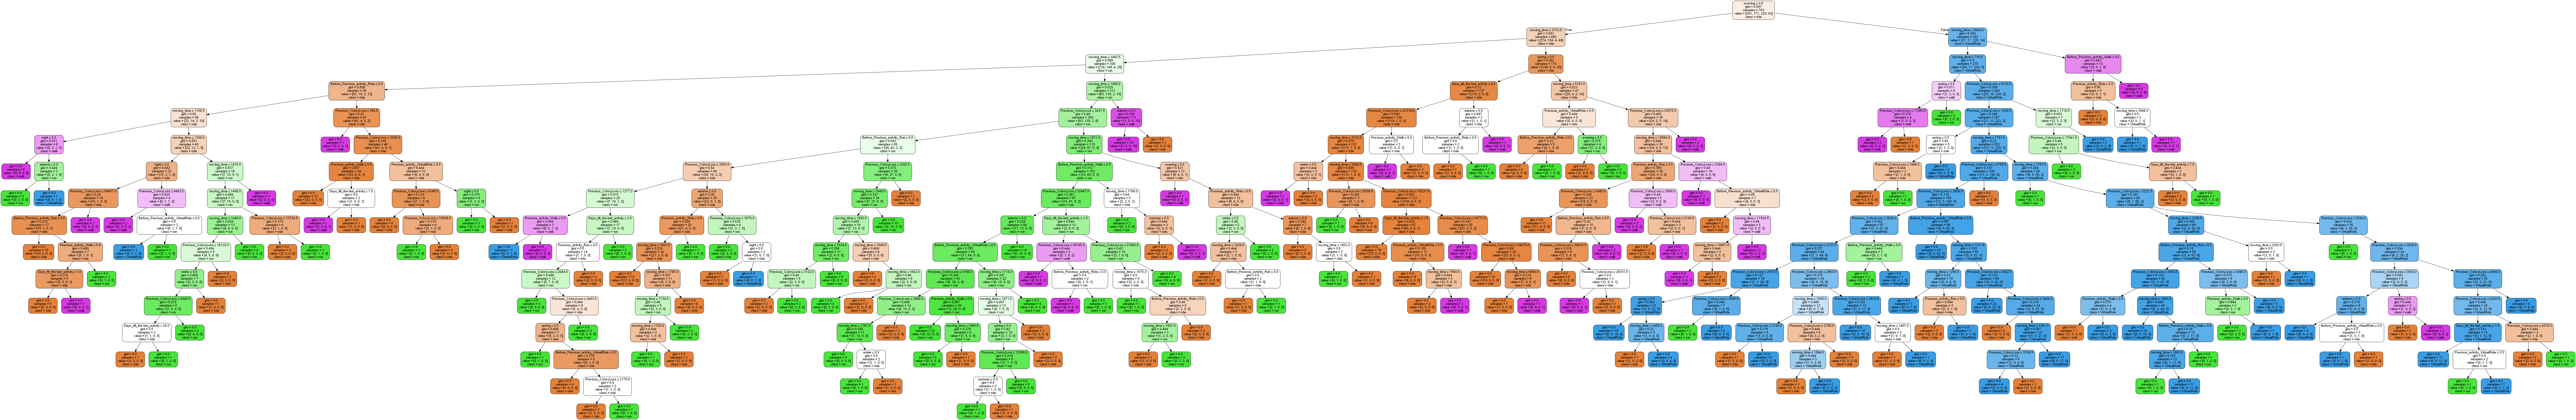

In [88]:
Image(graph.create_png())

In [89]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy",  max_depth=5)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
              
#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7439024390243902


In [90]:
from six import StringIO

from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['ride','run' ,'VirtualRide','walk'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  


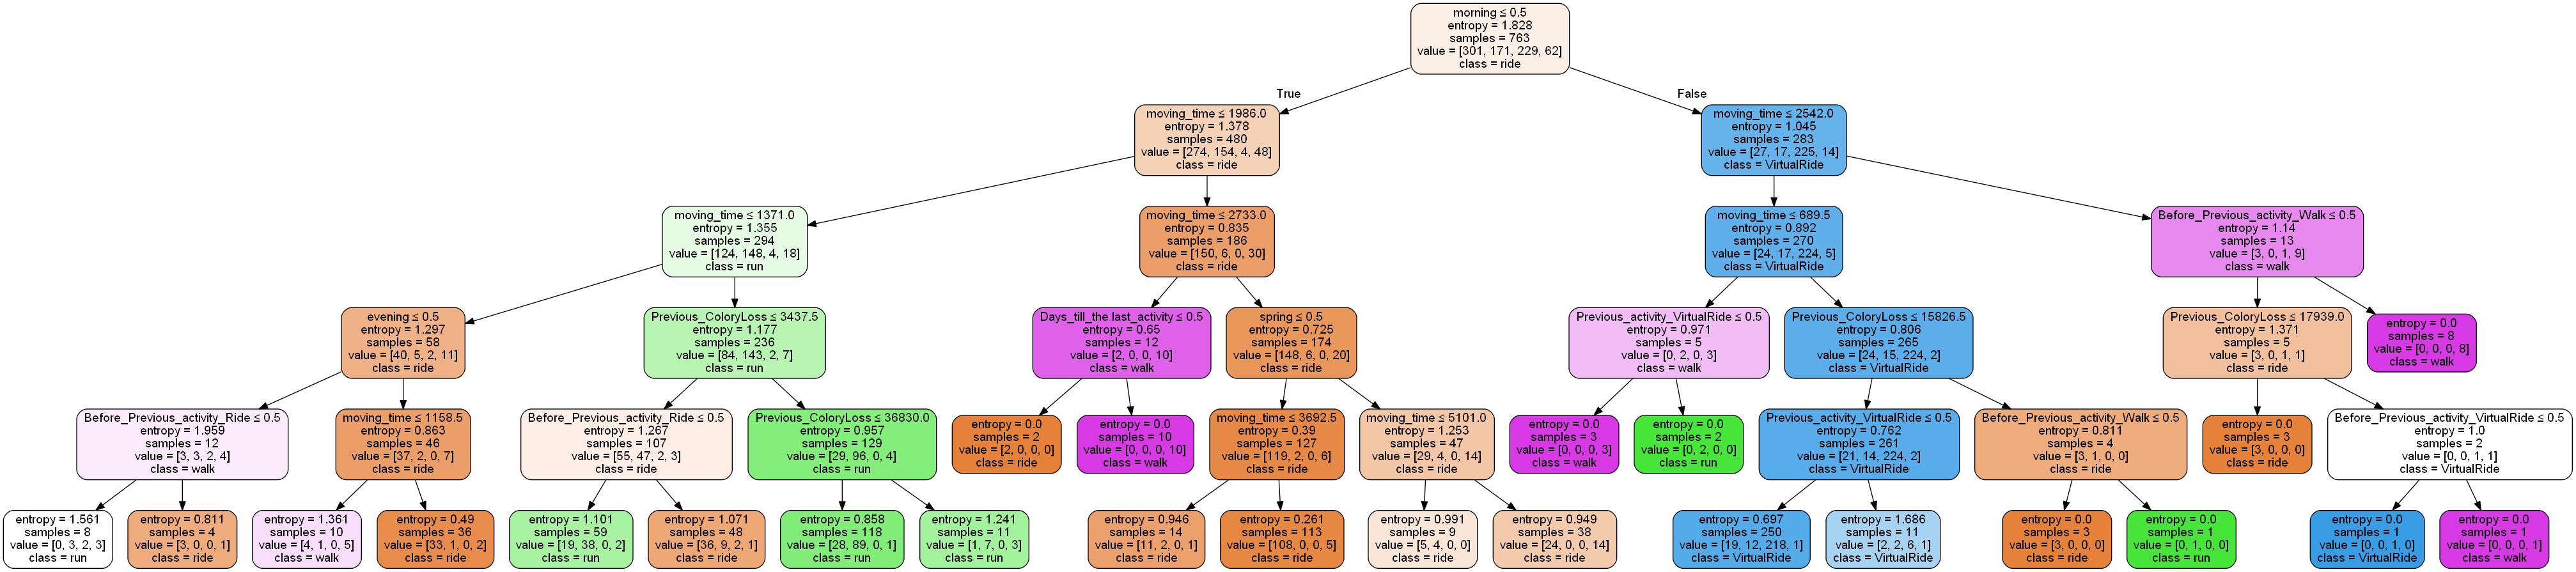

In [91]:
graph.write_png('tree4.png')
Image(graph.create_png())

In [92]:
feature_cols

Index(['moving_time', 'Days_till_the last_activity', 'Previous_ColoryLoss',
       'autumn', 'spring', 'summer', 'winter', 'afternoon', 'evening',
       'morning', 'night', 'Previous_activity_Ride', 'Previous_activity_Run',
       'Previous_activity_VirtualRide', 'Previous_activity_Walk',
       'Before_Previous_activity_Ride', 'Before_Previous_activity_Run',
       'Before_Previous_activity_VirtualRide',
       'Before_Previous_activity_Walk'],
      dtype='object')

In [93]:
X_test[2]

array([1190,    1, 4141,    1,    0,    0,    0,    0,    0,    1,    0,
          1,    0,    0,    0,    1,    0,    0,    0], dtype=int64)

In [835]:
y_test[2]

array([2])

In [94]:
pred = clf.predict([[   1190,    1, 4141,    1,    0,    0,    0,    0,    0,    1,    0,
          1,    0,    0,    0,    1,    0,    0,    0]])
pred

array([2])

In [95]:
pred

array([2])

In [840]:
# feature scalling
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)


In [841]:
# select 3 first elements of train set
some_data = X_train_std[:3]
some_predictions = lr.predict(some_data)
some_labels = y_train[:3]
print(f'some predictions{some_predictions} and some labels{some_labels}')

some predictions[[2.67246775]
 [4.60515058]
 [1.06706632]] and some labels[[0]
 [3]
 [0]]


The first was far but second and thrid not too bad

In [842]:
# calculate rmse
from sklearn.metrics import mean_squared_error
type_predictions_train = lr.predict(X_train_std)
type_predictions_test = lr.predict(X_test_std)
train_mse_lr = mean_squared_error(y_train,type_predictions_train)
train_rmse_lr = np.sqrt(train_mse_lr)



In [843]:
print(f'mse train {train_mse_lr:.2f}')
print(f'rmse train {train_rmse_lr:.2f}')

mse train 2.47
rmse train 1.57


Lets set it as the baseline to improve the model



Not too bad but the model looks a bit overfit.

Before we touch the training set for validation we can use the sklearn cross validation function. This function is a great way to validate the model without touching the training set until we are confident we have a good model.

What Cross Validation does is split the train set in k folds, usually 10 and train in k-1 fold and validate(test) on the reminder fold and loop though all combination without replacement. 
Sklearn calculate the metric you chose e.g. mse then it is possible to calculate the average and std deviation to evaluate the model and if it is overfit.

In [844]:
# Cross validation code
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr, X_train_std,y_train,scoring='neg_mean_squared_error',cv=10)
lr_rmse_scores = np.sqrt(-scores)



In [845]:
def display_scores(scores):
    print('Scores: ', scores)
    print('Mean: ', scores.mean())
    print('Standard deviarion: ', scores.std())

In [846]:
# mse Scores
display_scores(scores)

#rmse Scores
display_scores(lr_rmse_scores)

Scores:  [-8.24128354e-01 -6.43414583e-01 -5.92717994e-01 -5.47942167e-01
 -2.05673190e+25 -8.64119572e-01 -6.89591243e-01 -4.89199375e-01
 -6.93367651e-01 -6.62463729e-01]
Mean:  -2.0567319004954463e+24
Standard deviarion:  6.170195701486338e+24
Scores:  [9.07815154e-01 8.02131275e-01 7.69881805e-01 7.40231158e-01
 4.53512062e+12 9.29580320e-01 8.30416307e-01 6.99427891e-01
 8.32687007e-01 8.13918749e-01]
Mean:  453512061636.9637
Standard deviarion:  1360536184908.449


rmse is slighly worse which shows that is not too overfit.

One way to pick a good model is to quickly train other models and then compare the rmse with the baseline of the plain Linear regression model.

Other two options are decision trees and random forest

Lets fit them and validate on the training set

In [847]:
# decision tree regressor
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X_train_std,y_train)


DecisionTreeRegressor(max_depth=3)

In [848]:
type_predictions_train_tree = tree.predict(X_train_std)
type_predictions_test_tree = tree.predict(X_test_std)
train_mse_tree = mean_squared_error(y_train,type_predictions_train_tree)
train_rmse_tree = np.sqrt(train_mse_tree)


In [849]:
print(f'mse train {train_mse_tree:.2f}')
print(f'rmse train {train_rmse_tree:.2f}')

mse train 0.61
rmse train 0.78


In [850]:
# Cross Validation tree

scores = cross_val_score(tree, X_train_std,y_train,scoring='neg_mean_squared_error',cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [851]:
# mse Scores
display_scores(scores)

#rmse Scores
display_scores(tree_rmse_scores)

Scores:  [-0.78840565 -0.76740422 -0.49166628 -0.8244043  -0.67242029 -0.8462444
 -0.81144018 -0.4900781  -0.77664749 -0.70496925]
Mean:  -0.7173680138823799
Standard deviarion:  0.12359429274084928
Scores:  [0.88792209 0.87601611 0.70118919 0.90796712 0.82001237 0.91991543
 0.90079974 0.70005578 0.88127606 0.83962447]
Mean:  0.8434778364003257
Standard deviarion:  0.076897031046754


In [852]:
# random forest  regressor
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=1000,criterion='mse',random_state=1,n_jobs=-1)
forest.fit(X_train_std,y_train)


C:\Users\Salma Kastalli\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=1)

In [853]:
type_predictions_train_forest = forest.predict(X_train_std)
type_predictions_test_forest = forest.predict(X_test_std)
train_mse_forest = mean_squared_error(y_train,type_predictions_train_forest)
train_rmse_forest = np.sqrt(train_mse_forest)


In [854]:
print(f'mse train {train_mse_forest:.2f}')
print(f'rmse train {train_rmse_forest:.2f}')

mse train 0.11
rmse train 0.34


In [855]:
# Cross Validation Forest

scores = cross_val_score(forest, X_train_std,y_train,scoring='neg_mean_squared_error',cv=10)
forest_rmse_scores = np.sqrt(-scores)

C:\Users\Salma Kastalli\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Salma Kastalli\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Salma Kastalli\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Salma Kastalli\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usin

In [856]:
# mse Scores
display_scores(scores)

#rmse Scores
display_scores(forest_rmse_scores)

Scores:  [-0.87589121 -0.88622852 -0.50604092 -0.83439111 -0.78792042 -1.02938872
 -0.97033959 -0.58297984 -0.88017317 -0.83840099]
Mean:  -0.8191754491455912
Standard deviarion:  0.1529357197014397
Scores:  [0.9358906  0.94139711 0.71136553 0.91345011 0.88764882 1.01458796
 0.98505817 0.76353117 0.93817545 0.91564239]
Mean:  0.9006747296161466
Standard deviarion:  0.08922152529783553


Out of those 3 models the one that looks most overfit is Random forest

LR
rmse train: 4.78
rmse Mean CV: 5.04


Tree
rmse train: 4.93
rmse Mean CV: 5.35


RF
rmse train: 1.62
rmse Mean CV: 4.52

The LR model is not much different which suggest some degree of linearity in the data that is good for this exercise. We are on the right directions

We can now do some Hyperparameter optimisation to fine tune the most promissing model i.e. RF

For this we can use sklearn to find optimum hyperparameter trying many diferent combinations without being a tedious task

In [857]:
# getting the parameters from the first training
forest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1000,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

In [858]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}



In [859]:

print(random_grid)

{'n_estimators': [200, 650, 1100, 1550, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 35, 60, 85, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [860]:
# do a random search first for some guidance and find best hyperoarameters
rf = RandomForestRegressor()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 10, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train_std, y_train)



Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.4min


KeyboardInterrupt: 

In [ ]:
rf_random.best_params_

In [ ]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid 
param_grid = {
    'bootstrap': [True],
    'max_depth': [ 10, 10],
    'max_features': [2, 3],
    'min_samples_leaf': [1, 2],
    'min_samples_split': [2, 4],
    'n_estimators': [100, 500, 1000],
     'n_jobs': [-1]
}

# Create a based model
rf = RandomForestRegressor()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 10, scoring='neg_mean_squared_error')
# fit
grid_search.fit(X_train_std,y_train)

In [ ]:
# get best params
grid_search.best_params_

In [ ]:
# get best estimator
grid_search.best_estimator_

In [ ]:
cvres = grid_search.cv_results_

In [ ]:
for mean_score, params in zip(cvres['mean_test_score'],cvres['params']):
    print(np.sqrt(-mean_score), params)

In [ ]:
# finally train best estimator and get the rmse for best parameter

forest = grid_search.best_estimator_
forest.fit(X_train_std,y_train)

# predict and calculate rmse
type_predictions_train_forest = forest.predict(X_train_std)
type_predictions_test_forest = forest.predict(X_test_std)
train_mse_forest = mean_squared_error(y_train,type_predictions_train_forest)
train_rmse_forest = np.sqrt(train_mse_forest)

print(f'mse train {train_mse_forest:.2f}')
print(f'rmse train {train_rmse_forest:.2f}')

In the end it got a bit worse did I do anything wrong?

RF rmse train: 1.62 rmse Mean CV: 4.52

RF rmse train: 2.17 rmse Mean CV: 4.87 (below)

Let's do CV on the best estimator

In [ ]:
# Cross Validation Forest with best estimator

scores = cross_val_score(forest, X_train_std,y_train,scoring='neg_mean_squared_error',cv=10)
forest_rmse_scores = np.sqrt(-scores)

#rmse Scores
display_scores(forest_rmse_scores)


for now lets set the parameter of random forest back to original and proceed with the run on test data



In [ ]:
# random forest  regressor

forest = RandomForestRegressor(n_estimators=1000,criterion='mse',random_state=1,n_jobs=-1)
forest.fit(X_train_std,y_train)

type_predictions_train_forest = forest.predict(X_train_std)
type_predictions_test_forest = forest.predict(X_test_std)
train_mse_forest = mean_squared_error(y_train,type_predictions_train_forest)
train_rmse_forest = np.sqrt(train_mse_forest)

print(f'mse train {train_mse_forest:.2f}')
print(f'rmse train {train_rmse_forest:.2f}')

Lets get down to real test with test data

Now for the analysis and evaluation of the model will plot the residuals compating train and test predictions to true labels

will do with the regression, then decision tree and finally the random forest

In [ ]:
# Evaluate Residuals Plain Regression

fig, ax = plt.subplots(figsize=(8,8))
plt.style.use('ggplot')
plt.scatter(type_predictions_train,type_predictions_train-y_train,c='blue',marker='o',label='traing data')
plt.scatter(type_predictions_test,type_predictions_test-y_test,c='lightgreen',marker='s',label='test data')
plt.title('Regression Residuals')
plt.xlabel('predicted values')
plt.ylabel('residuals')
plt.legend(loc='upper left')
plt.hlines(y=0,xmin=0,xmax=4)
plt.xlim([0,4])
plt.show()



In [ ]:
# lets import another metric that in the case would be intersting analyse
from sklearn.metrics import r2_score
r2_train = r2_score(y_train,type_predictions_train)
r2_test = r2_score(y_test,type_predictions_test)


print(f'r2 train {r2_train:.2f}')
print(f'r2 test {r2_test:.2f}')

# Also do the test evaluation of rmse

test_mse_lr = mean_squared_error(y_test,type_predictions_test)
test_rmse_lr = np.sqrt(test_mse_lr)

print(f'rmse train {train_rmse_lr:.2f}')
print(f'rmse test {test_rmse_lr:.2f}')



The coeficient of determination or R squared ($R^2$) is the proportion of the variance in the dependent variable that is predictable from the independent variable(s). In other words how much x is explaining y.

It normally vary from 0 to 1 being 1 the perfect explanation. 

Not too bad for train but 0.4 for test is not impressive

Now let's see how the tree based models perform on the data

In [ ]:
# Evaluate Residuals Decision Tree

fig, ax = plt.subplots(figsize=(8,8))
plt.style.use('ggplot')
plt.scatter(type_predictions_train_tree,type_predictions_train_tree-y_train,c='blue',marker='o',label='traing data')
plt.scatter(type_predictions_test_tree,type_predictions_test_tree-y_test,c='lightgreen',marker='s',label='test data')
plt.title('Decision Tree Regression Residuals')
plt.xlabel('predicted values')
plt.ylabel('residuals')
plt.legend(loc='upper left')
plt.hlines(y=0,xmin=0,xmax=4)
plt.xlim([0,4])
plt.show()


Plotting the decision tree indicated that it is much better to use to predict discrete variables lets look at the test predictions. Also the model looks to be less overfit and the maximum prediciton is 30.79


In [ ]:
np.max(type_predictions_test_tree)

In [ ]:
r2_train = r2_score(y_train,type_predictions_train_tree)
r2_test = r2_score(y_test,type_predictions_test_tree)

print(f'r2 train {r2_train:.2f}')
print(f'r2 test {r2_test:.2f}')

# Also do the test evaluation of rmse

test_mse_tree = mean_squared_error(y_test,type_predictions_test_tree)
test_rmse_tree = np.sqrt(test_mse_tree)

print(f'rmse train {train_rmse_tree:.2f}')
print(f'rmse test {test_rmse_tree:.2f}')



In [ ]:
# Evaluate Residuals for random forest

fig, ax = plt.subplots(figsize=(8,8))
plt.style.use('ggplot')
plt.scatter(type_predictions_train_forest,type_predictions_train_forest-y_train,c='blue',marker='o',label='traing data')
plt.scatter(type_predictions_test_forest,type_predictions_test_forest-y_test,c='lightgreen',marker='s',label='test data')
plt.title('Random Forest Regression Residuals')
plt.xlabel('predicted values')
plt.ylabel('residuals')
plt.legend(loc='upper left')
plt.hlines(y=0,xmin=0,xmax=4)
plt.xlim([0,4])
plt.show()


In [ ]:
r2_train = r2_score(y_train,type_predictions_train_forest)
r2_test = r2_score(y_test,type_predictions_test_forest)

print(f'r2 train {r2_train:.2f}')
print(f'r2 test {r2_test:.2f}')


# Also do the test evaluation of rmse

test_mse_forest = mean_squared_error(y_test,type_predictions_test_forest)
test_rmse_forest = np.sqrt(test_mse_forest)

print(f'rmse train {train_rmse_forest:.2f}')
print(f'rmse test {test_rmse_forest:.2f}')


Amazing how well compared to others random forest performed. The test was better than the others training run.

the r2 was 0.96 which was great the the rmse 1.62. I would be happy with that in production data, but still the rmse test is 4.63

Let's see if we can do some feature selection and try to improve this



# Analysing feature importance

Random forest has a interesting result from its traing called  <a href="https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html">feature importance</a>



Let's dig into it

In [ ]:
forest.feature_importances_

In [ ]:
# evaluating feature importances
feat_labels = ride.drop('type',axis=1).columns
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for feature in range(X_train.shape[1]):
    print(f'{feature} - {feat_labels[indices[feature]]} {importances[indices[feature]]:.2f}')

Total elevation gain, max_speed, moving time, achievement count, kilojoules and distance is responsible to ~ 80% of the model predictions importance

In [ ]:
# plotting feature importance
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(10,5))
plt.title('Feature Importance',fontsize=15)
plt.bar(range(X_train.shape[1]),importances[indices],color='lightblue',align='center')
plt.xticks(range(X_train.shape[1]),feat_labels[indices],rotation=90)
plt.xlim([-1,X_train.shape[1]])
plt.tight_layout()


In [ ]:
# list of features in order of importance
feature_importance = [feat_labels[indices[feature]] for feature in range(X_train.shape[1]) ]

In [ ]:
feature_importance

In [ ]:
# collecting rmses for training and validation CV from the most import feature to the least important feature

train_rmse_s = []
validation_rmse_s = []
for i in range(len(feature_importance)):
    col = feature_importance[:i+1]
    
    
    X = ride.drop('type',axis=1).values
    y = integer_encoded

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

    stdsc = StandardScaler()
    X_train_std = stdsc.fit_transform(X_train)
    X_test_std = stdsc.transform(X_test)

    forest = RandomForestRegressor(n_estimators=1000,criterion='mse',random_state=1,n_jobs=-1)
    forest.fit(X_train_std,y_train)

    type_predictions_train_forest = forest.predict(X_train_std)
    type_predictions_test_forest = forest.predict(X_test_std)
    train_mse = mean_squared_error(y_train,type_predictions_train_forest)
    train_rmse = np.sqrt(train_mse)
    train_rmse_s.append(train_rmse)
    scores = cross_val_score(forest, X_train_std,y_train,scoring='neg_mean_squared_error',cv=10)
    forest_rmse_scores = np.sqrt(-scores)
    validation_rmse = forest_rmse_scores.mean()
    validation_rmse_s.append(validation_rmse)
    
    


Finally lets plot it to visualise

In [ ]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(10,7))
plt.title('rmse for trainig and test from adding feature by importance',fontsize=15)
plt.plot(range(1,len(feature_importance)+1),train_rmse_s,color='lightblue',label='rmse train',lw=3,marker='o')
for i in range(1,len(feature_importance)):
    plt.annotate(f'{train_rmse_s[i]:.2f}',
            xy=(i+1, train_rmse_s[i]), xycoords='data')
plt.plot(range(1,len(feature_importance)+1),validation_rmse_s,color='lightgreen',label='rmse validation',lw=3,marker='o')
for i in range(1,len(feature_importance)):
    plt.annotate(f'{validation_rmse_s[i]:.2f}',
            xy=(i+1, validation_rmse_s[i]), xycoords='data')
plt.xlabel("Number of important features")
plt.ylabel("rmse")
plt.xlim(1,max(range(1,len(feature_importance)+1)))
plt.legend(loc='upper right')
plt.tight_layout()


From the above chart we can observe that after the 8th feature, adding an extra feature it not improving the model performance in validation data, actually it is only getting worse and then flatens out

Finally we will then use only the top 8 most important feature, retrain our model and evaluate rmse and go with the best model for productions

In [ ]:
# select top 8 features

top8 = feature_importance[:8]

# pre-process the data

X = ride.loc[:,top8].values
y = ride['kudos_count'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

# Fit model
forest = RandomForestRegressor(n_estimators=1000,criterion='mse',random_state=1,n_jobs=-1)
forest.fit(X_train_std,y_train)

# Predict and calculate rmse
type_predictions_train_forest = forest.predict(X_train_std)
type_predictions_test_forest = forest.predict(X_test_std)
train_mse_forest = mean_squared_error(y_train,type_predictions_train_forest)
test_mse_forest = mean_squared_error(y_test,type_predictions_test_forest)
train_rmse_forest = np.sqrt(train_mse_forest)
test_rmse_forest = np.sqrt(test_mse_forest)
r2_train = r2_score(y_train,type_predictions_train_forest)
r2_test = r2_score(y_test,type_predictions_test_forest)


print(f'rmse train {train_rmse_forest:.2f}')
print(f'rmse test {test_rmse_forest:.2f}')
print(f'r2 train {r2_train:.2f}')
print(f'r2 test {r2_test:.2f}')



One final thing I would like to do it to plot the learning and validation curve to check if we can fix the overfiting issue and if we can get a more regularised model

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(forest,X_train_std,y_train,train_sizes=np.linspace(0.1,1.0,10),cv=10,n_jobs=1)


In [ ]:
# plot learning curve
plt.style.use('default')
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_mean, color='b',marker='o',markersize=5, label='training accuracy')
plt.fill_between(train_sizes,train_mean+train_std,train_mean-train_std,alpha=0.15,color='blue')
plt.plot(train_sizes, test_mean, color='g',marker='s',linestyle='--',markersize=5, label='validation accuracy')
plt.fill_between(train_sizes,test_mean+test_std,test_mean-test_std,alpha=0.15,color='g')

In [ ]:
# plot validation curve
from sklearn.model_selection import validation_curve

param_range = [1,10,200,500,800,1000]
train_scores, test_scores = validation_curve(forest,X_train_std,y_train,param_range=param_range,cv=10, param_name='n_estimators')




In [ ]:
train_mean = np.mean(train_scores,axis=1)
train_std = np.std(train_scores,axis=1)
test_mean = np.mean(test_scores,axis=1)
test_std = np.std(test_scores,axis=1)
plt.plot(param_range, train_mean, color='b',marker='o',markersize=5, label='training accuracy')
plt.fill_between(param_range,train_mean+train_std,train_mean-train_std,alpha=0.15,color='blue')
plt.plot(param_range, test_mean, color='g',marker='s',linestyle='--',markersize=5, label='validation accuracy')
plt.fill_between(param_range,test_mean+test_std,test_mean-test_std,alpha=0.15,color='g')


# Conclusion



For this particular model the random forest regressor demostrated to be the best predictior with a margin of erros of ~ 4.6 kudos which I can say is reasonable.

Feature selection by importance did not improve the model and I was not able to reduce overfit by regularisation and playing with the tree parameters. Despite all the attempts the best model for this problem proved to be the Random Forest Regressor compared to all other options tested

   
   